In [2122]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2123]:
import torch
import numpy as np
import pandas as pd

In [2124]:
from pandas import DataFrame
from IPython.display import HTML
#HTML(DataFrame(MYDATA).to_html())
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

In [2125]:
import sys
sys.path.append('/home/maghoi/fastai/old/')

In [2126]:
from fastai_v7.imports import *
from fastai_v7.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
set_plot_sizes(12,14,16)

In [2127]:
#from fastai.imports import *
#from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
from plotnine import *

In [2128]:
!ls main/data

02_Features	      complex_df.npy  models	      temp_model_blosum.csv
02_Features.zip       complex_df.npz  names.npy       X_mhc.npy
All_Energy.csv	      complexes.csv   pmhc_df.npy     X_pep.npy
All_identity.csv      data_X.npy      target_y.npy    X_tcr_a.npy
complex_df	      mhc_blosum.csv  tcr_blosum.csv  X_tcr_b.npy
complex_df.index.npy  Model_001       tcr_df.npy


In [2129]:
df_raw = pd.read_csv("/home/maghoi/main/data/complexes.csv", low_memory=False)
all_energy = pd.read_csv("/home/maghoi/main/data/All_Energy.csv", low_memory = False)

In [2130]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [2131]:
df_raw = df_raw.drop("Unnamed: 0", axis = 1)

In [2132]:
#set index to first column then drop it
df_raw = df_raw.set_index(df_raw.iloc[:,0]).drop("key_0", axis = 1)
all_energy = all_energy.set_index(all_energy.iloc[:,0]).drop("Unnamed: 0", axis = 1)

In [2133]:
all_energy.rename(columns = {"Unnamed: 0": "key_0"}, inplace = True)

In [2134]:
all_energy.index.name = "key_0"
df_raw.index.name = "key_0"

In [2135]:
display_all(all_energy.tail(20))

M_total energy  M_Backbone Hbond  \
key_0                                                          
5men_0p_R1_1t_99s_pMHC-TCR         37.4091          -140.261   
5men_0p_S1_1t_99s_pMHC-TCR         57.1499          -135.640   
5men_0p_P1_1t_95s_pMHC-TCR         31.3410          -133.143   
5men_0p_N1_1t_95s_pMHC-TCR         42.8556          -139.943   
5men_0p_N2_1t_95s_pMHC-TCR         35.5864          -138.738   
5men_0p_N3_1t_95s_pMHC-TCR         37.0827          -136.312   
5men_0p_R1_1t_95s_pMHC-TCR         33.9896          -138.572   
5men_0p_S1_1t_95s_pMHC-TCR         28.7505          -135.379   
5men_0p_P1_1t_90s_pMHC-TCR         41.5823          -133.021   
5men_0p_N1_1t_90s_pMHC-TCR         32.3616          -142.582   
5men_0p_N2_1t_90s_pMHC-TCR         22.2436          -141.849   
5men_0p_N3_1t_90s_pMHC-TCR         37.7567          -135.491   
5men_0p_R1_1t_90s_pMHC-TCR         31.3661          -140.749   
5men_0p_S1_1t_90s_pMHC-TCR         27.1967          -136.590   
5men_0p_P1_1t_80s_pMHC-TCR         40.4614          -137.219   
5men_0p_N1_1t_80s_pMHC-TCR         36.9587          -144.033   
5men_0p_N2_1t_80s_pMHC-TCR         31.5761          -141.021   
5men_0p_N3_1t_80s_pMHC-TCR         40.1811          -136.156   
5men_0p_R1_1t_80s_pMHC-TCR         36.1609          -133.004   
5men_0p_S1_1t_80s_pMHC-TCR         42.2487          -137.275   

                            M_Sidechain Hbond  M_Van der Waals  \
key_0                                                            
5men_0p_R1_1t_99s_pMHC-TCR           -55.3514         -209.869   
5men_0p_S1_1t_99s_pMHC-TCR           -49.6678         -209.131   
5men_0p_P1_1t_95s_pMHC-TCR           -53.0476         -206.219   
5men_0p_N1_1t_95s_pMHC-TCR           -54.5378         -208.937   
5men_0p_N2_1t_95s_pMHC-TCR           -53.3581         -210.573   
5men_0p_N3_1t_95s_pMHC-TCR           -53.4833         -208.328   
5men_0p_R1_1t_95s_pMHC-TCR           -49.8887         -209.065   
5men_0p_S1_1t_95s_pMHC-TCR           -54.2193         -206.664   
5men_0p_P1_1t_90s_pMHC-TCR           -52.5096         -206.829   
5men_0p_N1_1t_90s_pMHC-TCR           -51.8972         -205.233   
5men_0p_N2_1t_90s_pMHC-TCR           -56.9937         -210.161   
5men_0p_N3_1t_90s_pMHC-TCR           -48.6823         -206.284   
5men_0p_R1_1t_90s_pMHC-TCR           -51.5289         -208.674   
5men_0p_S1_1t_90s_pMHC-TCR           -51.5078         -203.677   
5men_0p_P1_1t_80s_pMHC-TCR           -51.7886         -211.202   
5men_0p_N1_1t_80s_pMHC-TCR           -57.5750         -207.817   
5men_0p_N2_1t_80s_pMHC-TCR           -48.1569         -211.153   
5men_0p_N3_1t_80s_pMHC-TCR           -52.2648         -207.637   
5men_0p_R1_1t_80s_pMHC-TCR           -45.2512         -206.585   
5men_0p_S1_1t_80s_pMHC-TCR           -51.9347         -209.346   

                            M_Electrostatics  M_Solvation Polar  \
key_0                                                             
5men_0p_R1_1t_99s_pMHC-TCR         -10.24710            291.137   
5men_0p_S1_1t_99s_pMHC-TCR          -6.12081            291.321   
5men_0p_P1_1t_95s_pMHC-TCR         -10.36030            285.290   
5men_0p_N1_1t_95s_pMHC-TCR         -10.95930            291.728   
5men_0p_N2_1t_95s_pMHC-TCR         -13.27480            291.624   
5men_0p_N3_1t_95s_pMHC-TCR          -9.86923            290.918   
5men_0p_R1_1t_95s_pMHC-TCR         -11.52320            285.646   
5men_0p_S1_1t_95s_pMHC-TCR         -10.95810            283.611   
5men_0p_P1_1t_90s_pMHC-TCR         -10.64450            288.802   
5men_0p_N1_1t_90s_pMHC-TCR         -10.54160            284.431   
5men_0p_N2_1t_90s_pMHC-TCR         -12.02160            289.171   
5men_0p_N3_1t_90s_pMHC-TCR         -10.60370            284.167   
5men_0p_R1_1t_90s_pMHC-TCR         -11.70520            286.957   
5men_0p_S1_1t_90s_pMHC-TCR          -9.98536            277.779   
5men_0p_P1_1t_80s_pMHC-TCR         -10.84330            292.825   
5men_0p_N1_1t_80s_pMHC-TCR 

### Measuring unique elements in all_identity

In [2136]:
df = pd.DataFrame({"1":df_raw.iloc[:,175:200].nunique().index, "2":df_raw.iloc[:,175:200].nunique()})
df = pd.DataFrame({"1":df_raw.nunique().index, "2":df_raw.nunique()})
df = df.drop("y_true", axis = 0)
df.iloc[:,0] = pd.to_numeric(df.iloc[:,0])

In [2137]:
df.dtypes

1    int64
2    int64
dtype: object

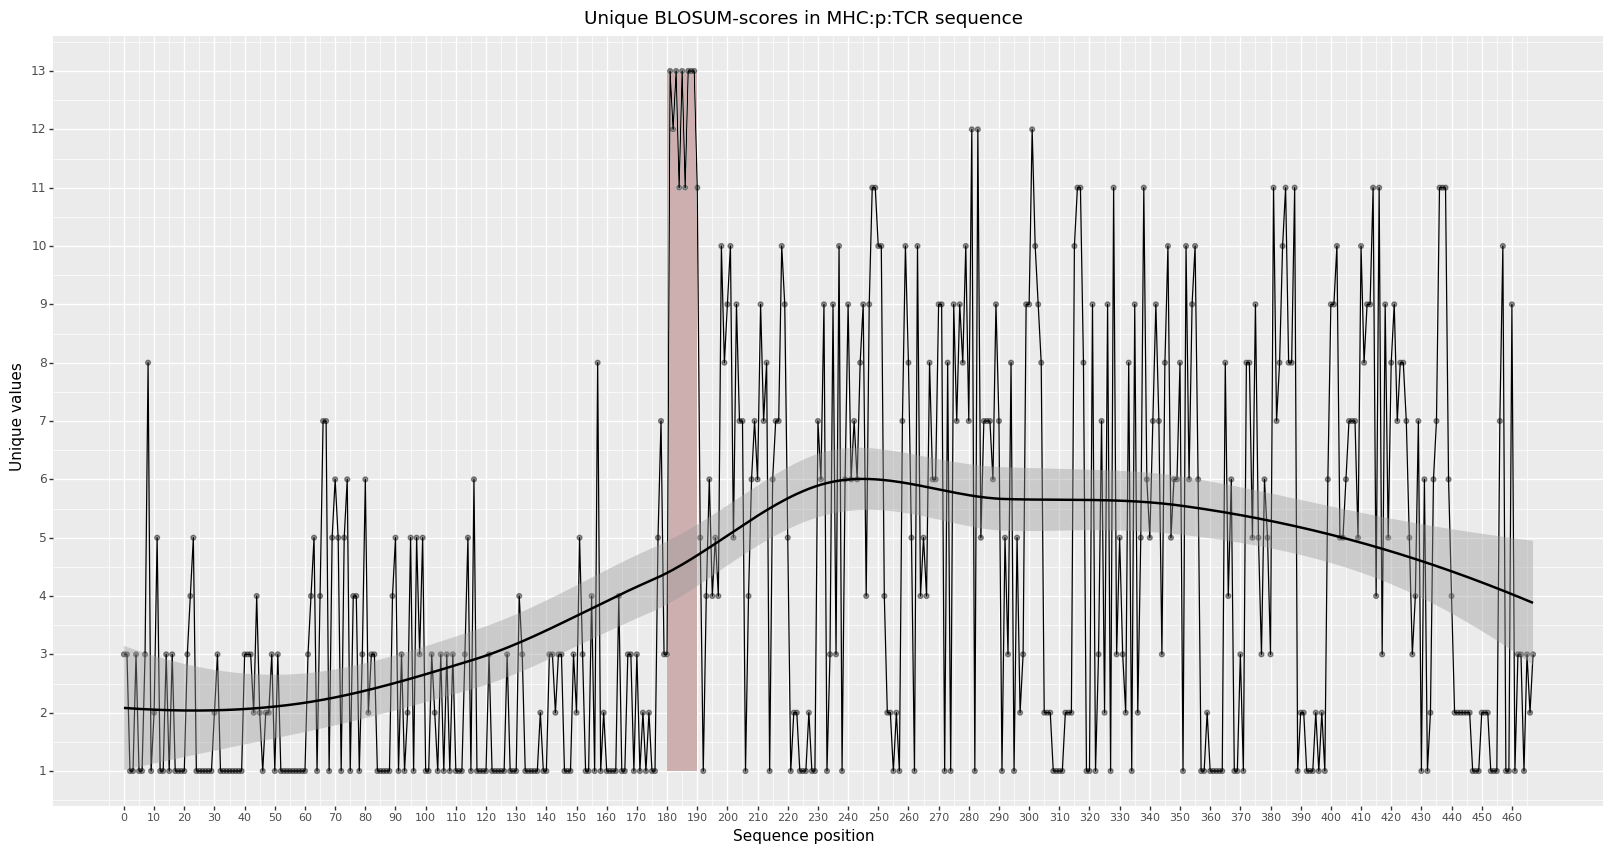

<ggplot: (8772920317146)>

In [2023]:
(ggplot(df, aes("1", "2"))
    + geom_point(alpha = 0.4)
    + scale_x_continuous(breaks=range(0, 467, 10))
    + scale_y_continuous(breaks=range(0, 15, 1))
#    + geom_jitter()
#    + geom_area()
#    + geom_polygon()
    + geom_line()
    + geom_rect(xmin = 180, xmax = 190, ymin = 1, ymax = 13, alpha = 0.002, fill = "#ceafaf")
    + theme(axis_text_x=element_text(size = 8))
    + theme(figure_size =(20,10))
    + stat_smooth(se=True, method='loess')
    + ggtitle("Unique BLOSUM-scores in MHC:p:TCR sequence")
    + xlab("Sequence position")
    + ylab("Unique values")
)

In [2024]:
df = pd.DataFrame({"1":all_energy.nunique().index, "2":all_energy.nunique()})
#df.iloc[:,0] = pd.to_numeric(df.iloc[:,0])
df.dtypes

1    object
2     int64
dtype: object

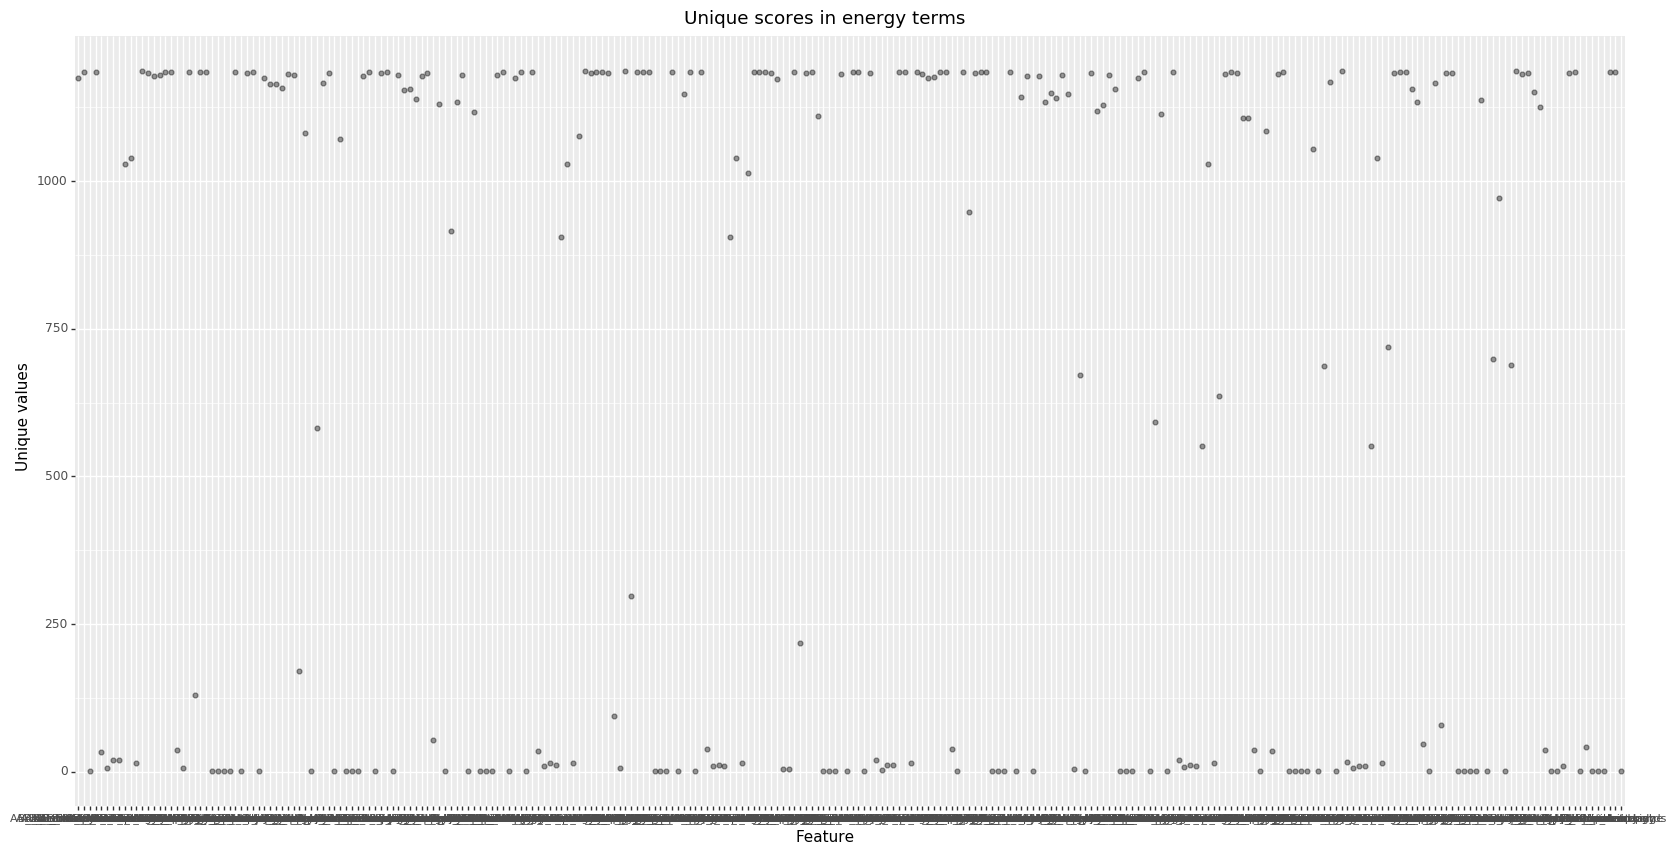

<ggplot: (8772920051418)>

In [2025]:
(ggplot(df, aes("1", "2"))
    + geom_point(alpha = 0.4)
    + geom_line()
    + theme(axis_text_x=element_text(size = 8))
    + theme(figure_size =(20,10))
    + stat_smooth(se=True, method='loess')
    + ggtitle("Unique scores in energy terms")
    + xlab("Feature")
    + ylab("Unique values")
)

# Creating modified datasets with, w/o energy terms, peptide...

In [2138]:
# Removing peptide
df_raw_nopep = df_raw.copy() #already contains y_true
df_raw_energy = all_energy.copy() #need to add y_true


#Create column of zeroes (negative complexes)
zeroes = np.zeros((len(df_raw_energy),1))
zeroes = pd.DataFrame(zeroes).set_index(df_raw_energy.index)

#Merge zeroes on the right of complex_df
df = pd.merge(df_raw_energy, zeroes, on = df_raw_energy.index);
df = df.rename(columns={0 : "y_true"})

#Change zero to 1 (true complex) for all true complexes
changes = df[df.iloc[:,0].str.contains("_P")].index
df.loc[changes, "y_true"] = 1

df_raw_energy = df.copy(deep = False)

In [2139]:
df_raw_energy = df_raw_energy.set_index(df_raw_energy.key_0).drop("key_0", axis = 1)
df_raw_energy = df_raw_energy.drop(labels = ["M_intface", "A_intface", "B_intface", "P_intface"], axis = 1)

In [2140]:
#Merge raw all
df_raw_all = pd.merge(df_raw.drop("y_true", axis = 1), df_raw_energy, on = df_raw.index)

In [2141]:
df_raw_all = df_raw_all.set_index(df_raw_all.key_0).drop("key_0", axis = 1)

In [2142]:
# Remove peptide blosum scores in df_raw_nopep and raw_all_nopep
df_raw_nopep.iloc[:,180:191] = np.zeros(shape = (1464,11))

#Raw all nopep
df_raw_all_nopep = df_raw_all.copy(deep = False)
#df_raw_all_nopep = df_raw_all_nopep.set_index(df_raw_all_nopep.key_0).drop("key_0", axis = 1)
df_raw_all_nopep.iloc[:,180:191] = np.zeros(shape = (1464,11))

In [2143]:
#Convert dataframes to numeric
df_raw_energy = df_raw_energy.apply(pd.to_numeric)
df_raw_all = df_raw_all.apply(pd.to_numeric)
df_raw_all_nopep = df_raw_all_nopep.apply(pd.to_numeric)

In [2144]:
#all
remove99 = df_raw[df_raw.index.str.contains("99s")].index
remove95 = df_raw[df_raw.index.str.contains("95s")].index
remove90 = df_raw[df_raw.index.str.contains("90s")].index

#all
df_99 = df_raw
df_95 = df_raw.drop(index = remove99, axis = 0)
df_90 = df_95.drop(index = remove95, axis = 0)
df_80 = df_90.drop(index = remove90, axis = 0)

#nopep
remove99_nopep = df_raw_nopep[df_raw_nopep.index.str.contains("99s")].index
remove95_nopep = df_raw_nopep[df_raw_nopep.index.str.contains("95s")].index
remove90_nopep = df_raw_nopep[df_raw_nopep.index.str.contains("90s")].index

#nopep
df_99_nopep = df_raw_nopep
df_95_nopep = df_raw_nopep.drop(index = remove99_nopep, axis = 0)
df_90_nopep = df_95_nopep.drop(index = remove95_nopep, axis = 0)
df_80_nopep = df_90_nopep.drop(index = remove90_nopep, axis = 0)

#all_energy
remove99_energy = df_raw_energy[df_raw_energy.index.str.contains("99s")].index
remove95_energy = df_raw_energy[df_raw_energy.index.str.contains("95s")].index
remove90_energy = df_raw_energy[df_raw_energy.index.str.contains("90s")].index

#all_energy
df_99_energy = df_raw_energy
df_95_energy = df_raw_energy.drop(index = remove99_energy, axis = 0)
df_90_energy = df_95_energy.drop(index = remove95_energy, axis = 0)
df_80_energy = df_90_energy.drop(index = remove90_energy, axis = 0)

In [2145]:
#all combined
remove99_all = df_raw_all[df_raw_all.index.str.contains("99s")].index
remove95_all = df_raw_all[df_raw_all.index.str.contains("95s")].index
remove90_all = df_raw_all[df_raw_all.index.str.contains("90s")].index

#all combined
df_99_all = df_raw_all
df_95_all = df_raw_all.drop(index = remove99_all, axis = 0)
df_90_all = df_95_all.drop(index = remove95_all, axis = 0)
df_80_all = df_90_all.drop(index = remove90_all, axis = 0)

In [2146]:
#all_nopep combined
remove99_all_nopep = df_raw_all_nopep[df_raw_all_nopep.index.str.contains("99s")].index
remove95_all_nopep = df_raw_all_nopep[df_raw_all_nopep.index.str.contains("95s")].index
remove90_all_nopep = df_raw_all_nopep[df_raw_all_nopep.index.str.contains("90s")].index

#all_nopep combined
df_99_all_nopep = df_raw_all_nopep
df_95_all_nopep = df_raw_all_nopep.drop(index = remove99_all_nopep, axis = 0)
df_90_all_nopep = df_95_all_nopep.drop(index = remove95_all_nopep, axis = 0)
df_80_all_nopep = df_90_all_nopep.drop(index = remove90_all_nopep, axis = 0)

In [2147]:
df_raw.shape, df_95.shape, df_90.shape, df_80.shape

((1464, 469), (1098, 469), (732, 469), (366, 469))

### Saving

In [2148]:
df_raw_all

0  1  2  3  4  5  6  7  8  9  ...  \
key_0                                                     ...   
1g6r_1p_P1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...   
1g6r_1p_N1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...   
1g6r_1p_N2_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...   
1g6r_1p_N3_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...   
1g6r_1p_R1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...   
1g6r_1p_S1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...   
1g6r_1p_P1_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...   
1g6r_1p_N1_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...   
1g6r_1p_N2_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...   
1g6r_1p_N3_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...   
1g6r_1p_R1_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...   
1g6r_1p_S1_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...   
1g6r_1p_P1_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...   
1g6r_1p_N1_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...   
1g6r_1p_N2_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...   
1g6r_1p_N3_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...   
1g6r_1p_R1_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...   
1g6r_1p_S1_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...   
1g6r_1p_P1_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...   
1g6r_1p_N1_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...   
1g6r_1p_N2_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...   
1g6r_1p_N3_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...   
1g6r_1p_R1_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...   
1g6r_1p_S1_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...   
1mwa_1p_P1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...   
1mwa_1p_N1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...   
1mwa_1p_N2_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...   
1mwa_1p_N3_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...   
1mwa_1p_R1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...   
1mwa_1p_S1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...   
...                        .. .. .. .. .. .. .. .. .. ..  ...   
5hho_4p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5hho_4p_N1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5hho_4p_N2_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5hho_4p_N3_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5hho_4p_R1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5hho_4p_S1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_P1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_N1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_N2_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_N3_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_R1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_S1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_P1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_N1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_N2_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_N3_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_R1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_S1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_P1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_N1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_N2_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_N3_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_R1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_S1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_N1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_N2_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_N3_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...   
5men_0p_R1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...  

In [2120]:
df_raw_all.to_feather("/home/maghoi/main/data/df_raw_all")

ValueError: feather does not support serializing <class 'pandas.core.indexes.base.Index'> for the index; you can .reset_index()to make the index into column(s)

# Statistical testing: importance of peptide

In [2149]:
peptide = df_raw.iloc[:, 181:191]

In [2150]:
peptide_pos = peptide[peptide.index.str.contains("_P")]
peptide_high = peptide[peptide.index.str.contains("_N")]
peptide_low = peptide[peptide.index.str.contains("_R")]
peptide_switch = peptide[peptide.index.str.contains("_S")]

In [2151]:
data = pd.DataFrame({"Pos":peptide_pos.mean(), "High":peptide_high.mean(), "Low":peptide_low.mean(), "Switch":peptide_switch.mean()})
data 


Pos      High       Low    Switch
181  2.241803 -0.460383 -0.848361  2.069672
182  2.504098  0.941257  3.319672  2.049180
183  2.905738 -0.517760 -0.405738  2.500000
184  2.610656 -1.155738 -0.987705  3.295082
185  3.053279 -1.114754 -1.213115  2.450820
186  3.028689 -0.916667  1.196721  2.938525
187  1.750000 -0.329235 -1.282787  2.184426
188  2.639344 -0.403005 -1.795082  2.684426
189  2.655738  0.280055  0.713115  2.754098
190 -1.045082 -1.729508 -1.885246 -1.061475

In [2152]:
peptide_pos.apply

<bound method DataFrame.apply of                             181  182  183  184  185  186  187  188  189  190
key_0                                                                       
1g6r_1p_P1_1t_80s_pMHC-TCR    1   -1    3   -1   -1   -3    0    2   -4   -4
1g6r_1p_P1_1t_90s_pMHC-TCR    0   -3    7    2    3    7    0    1   -4   -4
1g6r_1p_P1_1t_95s_pMHC-TCR    0   -3    7    2    3    7    0    1   -4   -4
1g6r_1p_P1_1t_99s_pMHC-TCR    0   -3    7    2    3    7    0    1   -4   -4
1mwa_1p_P1_1t_80s_pMHC-TCR   -1   -1    3   -1    0   -3    4    3   -4   -4
1mwa_1p_P1_1t_90s_pMHC-TCR    0   -3    7    2    3    7    0    1   -4   -4
1mwa_1p_P1_1t_95s_pMHC-TCR    0   -3    7    2    3    7    0    1   -4   -4
1mwa_1p_P1_1t_99s_pMHC-TCR    0   -3    7    2    3    7    0    1   -4   -4
2bnq_2p_P1_1t_80s_pMHC-TCR    1    4    1   -2   -1    3    0   -1    4   -4
2bnq_2p_P1_1t_90s_pMHC-TCR    1    4    1   -2   -1    3    0   -1    4   -4
2bnq_2p_P1_1t_95s_pMHC-TCR    4    4    4  

In [2153]:
peptide_pos = pd.DataFrame(peptide_pos.to_numpy().flatten())
peptide_high = pd.DataFrame(peptide_high.to_numpy().flatten())
peptide_low = pd.DataFrame(peptide_low.to_numpy().flatten())
peptide_switch = pd.DataFrame(peptide_switch.to_numpy().flatten())

##### Mann-Whitney U test comparison of all BLOSUM scores for pos, neg, switch peptides

In [2154]:
print("Pos vs switch:", scipy.stats.mannwhitneyu(peptide_pos, peptide_switch))
print("Pos vs high:", scipy.stats.mannwhitneyu(peptide_pos, peptide_high))
print("Pos vs low:", scipy.stats.mannwhitneyu(peptide_pos, peptide_low))

Pos vs switch: MannwhitneyuResult(statistic=2956362.5, pvalue=0.3376120219523998)
Pos vs high: MannwhitneyuResult(statistic=5096378.5, pvalue=4.4217061397069526e-226)
Pos vs low: MannwhitneyuResult(statistic=1815367.0, pvalue=3.8964065606371034e-125)


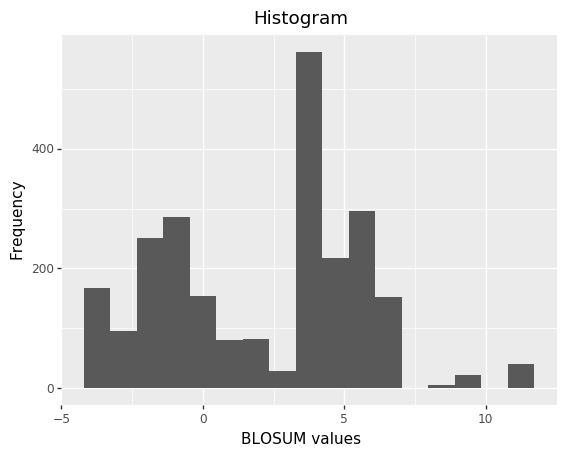

<ggplot: (-9223363263988989173)>

In [2102]:
df = peptide_pos
(ggplot(df, aes(x = df))
    + geom_histogram()
    + ggtitle("Histogram")
    + xlab("BLOSUM values")
    + ylab("Frequency")
)

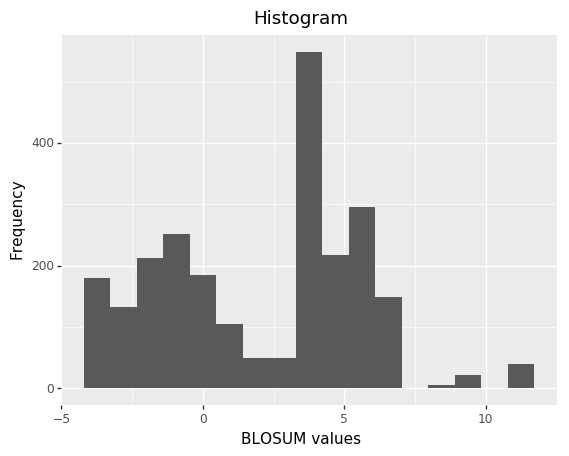

<ggplot: (8772891596068)>

In [2103]:
df = peptide_switch
(ggplot(df, aes(x = df))
    + geom_histogram()
    + ggtitle("Histogram")
    + xlab("BLOSUM values")
    + ylab("Frequency")
)

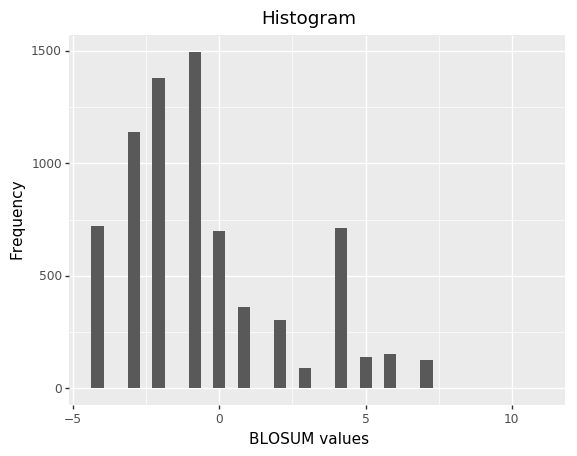

<ggplot: (8772891602934)>

In [2104]:
df = peptide_high
(ggplot(df, aes(x = df))
    + geom_histogram()
    + ggtitle("Histogram")
    + xlab("BLOSUM values")
    + ylab("Frequency")
)

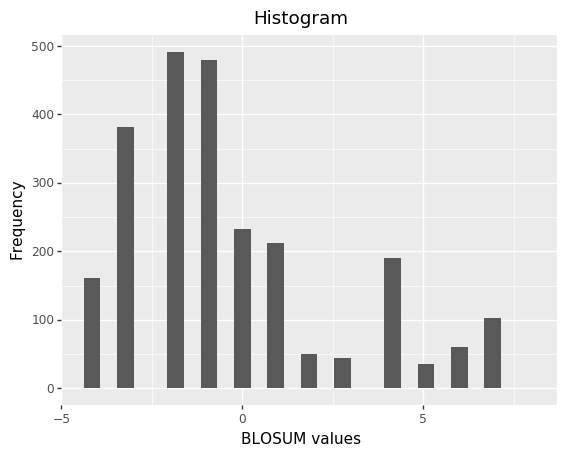

<ggplot: (-9223363263973447073)>

In [2105]:
df = peptide_low
(ggplot(df, aes(x = df))
    + geom_histogram()
    + ggtitle("Histogram")
    + xlab("BLOSUM values")
    + ylab("Frequency")
)

In [ ]:
changes = df[df.iloc[:,0].str.contains("_P")].index
df.loc[changes, "y_true"] = 1


## Random forest

In [2155]:
#complex
y_99 = df_raw.y_true
y_95 = df_95.y_true
y_90 = df_90.y_true
y_80 = df_80.y_true

#complex
df_99 = df_raw.drop("y_true", axis = 1)
df_95 = df_95.drop("y_true", axis = 1)
df_90 = df_90.drop("y_true", axis = 1)
df_80 = df_80.drop("y_true", axis = 1)

#nopep
y_99_nopep = df_raw_nopep.y_true
y_95_nopep = df_95_nopep.y_true
y_90_nopep = df_90_nopep.y_true
y_80_nopep = df_80_nopep.y_true

#nopep
df_99_nopep = df_raw_nopep.drop("y_true", axis = 1)
df_95_nopep = df_95_nopep.drop("y_true", axis = 1)
df_90_nopep = df_90_nopep.drop("y_true", axis = 1)
df_80_nopep = df_80_nopep.drop("y_true", axis = 1)

#energy
y_99_energy = df_raw_energy.y_true
y_95_energy = df_95_energy.y_true
y_90_energy = df_90_energy.y_true
y_80_energy = df_80_energy.y_true

#energy
df_99_energy = df_raw_energy.drop("y_true", axis = 1)
df_95_energy = df_95_energy.drop("y_true", axis = 1)
df_90_energy = df_90_energy.drop("y_true", axis = 1)
df_80_energy = df_80_energy.drop("y_true", axis = 1)

#all combined
y_99_all = df_raw_all.y_true
y_95_all = df_95_all.y_true
y_90_all = df_90_all.y_true
y_80_all = df_80_all.y_true

#all combined
df_99_all = df_raw_all.drop("y_true", axis = 1)
df_95_all = df_95_all.drop("y_true", axis = 1)
df_90_all = df_90_all.drop("y_true", axis = 1)
df_80_all = df_80_all.drop("y_true", axis = 1)

#all_nopep combined
y_99_all_nopep = df_raw_all_nopep.y_true
y_95_all_nopep = df_95_all_nopep.y_true
y_90_all_nopep = df_90_all_nopep.y_true
y_80_all_nopep = df_80_all_nopep.y_true

#all_nopep combined
df_99_all_nopep = df_raw_all_nopep.drop("y_true", axis = 1)
df_95_all_nopep = df_95_all_nopep.drop("y_true", axis = 1)
df_90_all_nopep = df_90_all_nopep.drop("y_true", axis = 1)
df_80_all_nopep = df_80_all_nopep.drop("y_true", axis = 1)



In [2156]:
y_99.shape, y_95.shape, y_90.shape, y_80.shape

((1464,), (1098,), (732,), (366,))

In [2157]:
df_99.shape, df_95.shape, df_90.shape, df_80.shape

((1464, 468), (1098, 468), (732, 468), (366, 468))

In [2158]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_99, y_99)
m.score(df_99, y_99)

0.9897704918032786

## Split vals

In [2159]:
df, y = df_99, y_99

In [2160]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = int(len(df) / 5)  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((1172, 468), (1172,), (292, 468))

In [2161]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print("1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_")
    print(res)
    y_hat = np.where(m.predict(X_valid) <= 0.5, 0, 1)
    
    print("MCC:", metrics.matthews_corrcoef(y_valid, y_hat))
    print("AP:",  metrics.average_precision_score(y_valid, y_hat))
    tn, fp, fn, tp = metrics.confusion_matrix(y_valid, y_hat).ravel()
    print("True positive rate:", tp/(tp+fn))
    print("True negative rate:", tn/(fp+tn))
    print("Confusion matrix:\n", metrics.confusion_matrix(y_valid, y_hat))
    print("tn, fp, fn, tp")

### Defining lists of dataframes and ys

In [2162]:
#Normal dataset
dfs, ys, names = [df_99, df_95, df_90, df_80], [y_99, y_95, y_90, y_80], ["99%", "95%", "90%", "80%"]

#Dataset with peptide "removed" -> set to 0
dfs_nopep, ys_nopep, names_nopep = [df_99_nopep, df_95_nopep, df_90_nopep, df_80_nopep], [y_99_nopep, y_95_nopep, y_90_nopep, y_80_nopep], ["99%", "95%", "90%", "80%"]

#Energy terms
dfs_energy, ys_energy, names_energy = [df_99_energy, df_95_energy, df_90_energy, df_80_energy], [y_99_energy, y_95_energy, y_90_energy, y_80_energy], ["99%", "95%", "90%", "80%"]

#All comb terms
dfs_all, ys_all, names_all = [df_99_all, df_95_all, df_90_all, df_80_all], [y_99_all, y_95_all, y_90_all, y_80_all], ["99%", "95%", "90%", "80%"]

#All nopep terms
dfs_all_nopep, ys_all_nopep, names_all_nopep = [df_99_all_nopep, df_95_all_nopep, df_90_all_nopep, df_80_all_nopep], [y_99_all_nopep, y_95_all_nopep, y_90_all_nopep, y_80_all_nopep], ["99%", "95%", "90%", "80%"]




### Complex BLOSUM score dataset full

#### Choice of trees

In [1236]:
for df, y, names in zip(dfs, ys, names):
    print(names)
    m = RandomForestRegressor(n_jobs=-1)
    %time m.fit(df, y)
    print_score(m)

99%
CPU times: user 246 ms, sys: 3.66 ms, total: 250 ms
Wall time: 115 ms


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.03648366785943837, 0.03881815702823221, 0.9904424556707929, 0.9890300546448088]
MCC: 1.0
AP: 1.0
True positive rate: 1.0
True negative rate: 1.0
Confusion matrix:
 [[244   0]
 [  0  48]]
tn, fp, fn, tp
95%


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 222 ms, sys: 8.33 ms, total: 230 ms
Wall time: 113 ms
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.06352823134224969, 0.08213753917951132, 0.9710210354633657, 0.9508845628415301]
MCC: 0.9875069964446889
AP: 0.9825913242009132
True positive rate: 0.9791666666666666
True negative rate: 1.0
Confusion matrix:
 [[244   0]
 [  1  47]]
tn, fp, fn, tp
90%


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 181 ms, sys: 4.9 ms, total: 186 ms
Wall time: 111 ms
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.08272244805957615, 0.13996085558430404, 0.950864419538307, 0.8573907103825137]
MCC: 0.9111628523276832
AP: 0.8731418061897515
True positive rate: 0.8958333333333334
True negative rate: 0.9918032786885246
Confusion matrix:
 [[242   2]
 [  5  43]]
tn, fp, fn, tp
80%


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 118 ms, sys: 4.41 ms, total: 122 ms
Wall time: 110 ms
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.24082126265360185, 0.266059525732263, 0.5835728922716628, 0.4846618852459015]
MCC: 0.674702809092281
AP: 0.5821917808219178
True positive rate: 0.5
True negative rate: 1.0
Confusion matrix:
 [[244   0]
 [ 24  24]]
tn, fp, fn, tp


In [240]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 1.0, 1.0)

In [241]:
preds.shape

(10, 300)

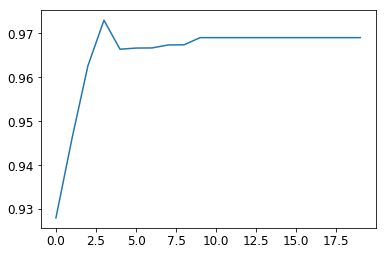

In [242]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(20)]);

In [243]:
for df, y in zip(dfs, ys):
    m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
    m.fit(X_train, y_train)
    print_score(m)

1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.05271812610167519, 0.050104058385191365, 0.9799897540983606, 0.981925]
MCC: 1.0
AP: 1.0
True positive rate: 1.0
True negative rate: 1.0
Confusion matrix:
 [[250   0]
 [  0  50]]
tn, fp, fn, tp
1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.05108120610837547, 0.055302200076790195, 0.9812131147540984, 0.97798]
MCC: 1.0
AP: 1.0
True positive rate: 1.0
True negative rate: 1.0
Confusion matrix:
 [[250   0]
 [  0  50]]
tn, fp, fn, tp
1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.051464216439876816, 0.05259911279353166, 0.9809303278688525, 0.9800799999999998]
MCC: 1.0
AP: 1.0
True positive rate: 1.0
True negative rate: 1.0
Confusion matrix:
 [[250   0]
 [  0  50]]
tn, fp, fn, tp
1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.053716869316633914, 0.0550946155868853, 0.9792243852459016, 0.9781450000000002]
MCC: 1.0
AP: 1.0
Tru

#### Tree visualization: Moving y_true value for amino acid blosum scores

In [148]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.26856485328287016, 0.3368842775869728, 0.4806850209842778, 0.18286468130586397]


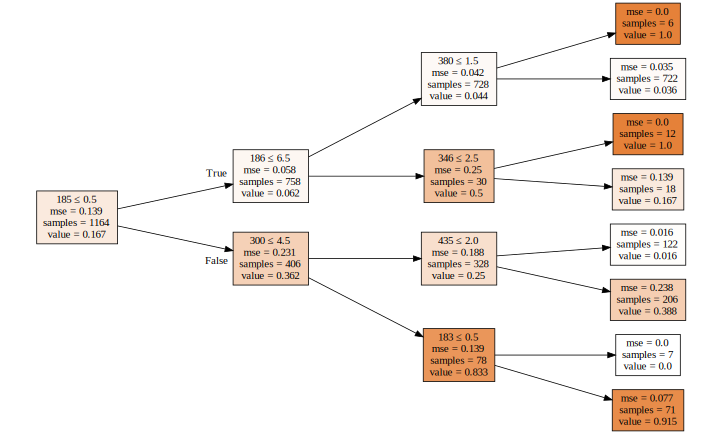

In [149]:
draw_tree(m.estimators_[0], df_trn, precision=3)

####  Random forest out of bag validation achieves > 86 % accuracy

In [246]:
for df, y in zip(dfs, ys):
    m = RandomForestRegressor(n_estimators=8, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)

/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.06899329776588464, 0.059947894041408996, 0.9657274590163935, 0.974125, 0.8778943766031002]
MCC: 0.9881652636251156
AP: 0.9803921568627451
True positive rate: 1.0
True negative rate: 0.996
Confusion matrix:
 [[249   1]
 [  0  50]]
tn, fp, fn, tp


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.05789009985482998, 0.06166103577895309, 0.9758709016393443, 0.972625, 0.8945184705029553]
MCC: 1.0
AP: 1.0
True positive rate: 1.0
True negative rate: 1.0
Confusion matrix:
 [[250   0]
 [  0  50]]
tn, fp, fn, tp


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.06068048204850835, 0.07252872993970505, 0.9734887295081968, 0.962125, 0.8735803362328538]
MCC: 0.9879755146408642
AP: 0.9833333333333333
True positive rate: 0.98
True negative rate: 1.0
Confusion matrix:
 [[250   0]
 [  1  49]]
tn, fp, fn, tp


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.0700677852905251, 0.06081049799719344, 0.9646516393442623, 0.973375, 0.8772532201405152]
MCC: 0.9881652636251156
AP: 0.9803921568627451
True positive rate: 1.0
True negative rate: 0.996
Confusion matrix:
 [[249   1]
 [  0  50]]
tn, fp, fn, tp


#### Subsampling for increased accuracy ...

In [264]:
df, y = df_99, y_99
df.shape, y.shape

((1464, 468), (1464,))

In [2163]:
df_trn, y_trn = df, y
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
set_rf_samples(int((1/2)*len(df_trn)))

m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_t
      rain)
print_score(m)

SyntaxError: invalid syntax (<ipython-input-2163-74ffd90b1033>, line 8)

# 
# Final trees - hyperparameters optimized for MCC / accuracy
# 

In [2164]:
X_train.shape

(1172, 468)

In [2165]:
dfs, ys, names = [df_99, df_95, df_90, df_80], [y_99, y_95, y_90, y_80], ["99%", "95%", "90%", "80%"]
dfs_nopep, ys_nopep, names_nopep = [df_99_nopep, df_95_nopep, df_90_nopep, df_80_nopep], [y_99_nopep, y_95_nopep, y_90_nopep, y_80_nopep], ["99%", "95%", "90%", "80%"]

###  BLOSUM of complex with peptide
MCC: 0.8615413635611239

In [1351]:
for df, y, name in zip(dfs, ys, names):
    df_trn, y_trn = df, y
    
    n_valid = int(len(df) / 6) # validation = 1/6th of set
    n_trn = len(df)-n_valid
    X_train, X_valid = split_vals(df, n_trn)
    y_train, y_valid = split_vals(y, n_trn)
    print("\nSet:", name)
    print("Train x, train y, valid x shape:\n", X_train.shape, y_train.shape, X_valid.shape)
    
    set_rf_samples(int((10/10)*len(df_trn))) #Random forest samples from all of rows (performs better)
    
    
    m = RandomForestRegressor(n_estimators=120, max_features=1, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)


Set: 9
Train x, train y, valid x shape:
 (1220, 468) (1220,) (244, 468)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.03553920460213312, 0.20566944427807898, 0.9909299184185923, 0.6913764637799563, 0.8978934200572332]
MCC: 0.8615413635611239
AP: 0.8118852459016394
True positive rate: 0.775
True negative rate: 1.0
Confusion matrix:
 [[204   0]
 [  9  31]]
tn, fp, fn, tp

Set: 9
Train x, train y, valid x shape:
 (915, 468) (915,) (183, 468)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.039673645893796794, 0.2374610503964248, 0.9886968364554921, 0.5885905501089326, 0.8693067814910607]
MCC: 0.7910542782677079
AP: 0.721311475409836
True positive rate: 0.6666666666666666
True negative rate: 1.0
Confusion matrix:
 [[153   0]
 [ 10  20]]
tn, fp, fn, tp

Set: %
Train x, train y, valid x shape:
 (610, 468) (610,) (122, 468)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_sc

### BLOSUM of complex without peptide
MCC: 0.3088361395624583

In [1352]:
for df, y, name in zip(dfs_nopep, ys_nopep, names_nopep):
    df_trn, y_trn = df, y
    
    n_valid = int(len(df) / 6) # validation = 1/6th of set
    n_trn = len(df)-n_valid
    X_train, X_valid = split_vals(df, n_trn)
    y_train, y_valid = split_vals(y, n_trn)
    print("\nSet:", name)
    print("Train x, train y, valid x shape:\n", X_train.shape, y_train.shape, X_valid.shape)
    
    set_rf_samples(int((10/10)*len(df_trn))) #Random forest samples from all of rows (performs better)
    
    
    m = RandomForestRegressor(n_estimators=120, max_features=None, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)


Set: 99%
Train x, train y, valid x shape:
 (1220, 468) (1220,) (244, 468)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.3007673934924792, 0.351863919994944, 0.3503831365189999, 0.0966855296065684, 0.058918317118238694]
MCC: 0.3088361395624583
AP: 0.2644808743169399
True positive rate: 0.2
True negative rate: 0.9803921568627451
Confusion matrix:
 [[200   4]
 [ 32   8]]
tn, fp, fn, tp

Set: 95%
Train x, train y, valid x shape:
 (915, 468) (915,) (183, 468)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.29285780016589097, 0.3499396730898445, 0.38410117212811556, 0.10653847051159193, 0.03472891876114126]
MCC: 0.27975330400065224
AP: 0.25132408575031523
True positive rate: 0.23333333333333334
True negative rate: 0.9607843137254902
Confusion matrix:
 [[147   6]
 [ 23   7]]
tn, fp, fn, tp

Set: 90%
Train x, train y, valid x shape:
 (610, 468) (610,) (122, 468)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 

### Only energy terms
MCC: 0.2576431925154204

In [1347]:
for df, y, name in zip(dfs_energy, ys_energy, names_energy):
    df_trn, y_trn = df, y
    
    n_valid = int(len(df) / 6) # validation = 1/6th of set
    n_trn = len(df)-n_valid
    X_train, X_valid = split_vals(df, n_trn)
    y_train, y_valid = split_vals(y, n_trn)
    print("\nSet:", name)
    print("Train x, train y, valid x shape:\n", X_train.shape, y_train.shape, X_valid.shape)
    
    set_rf_samples(int((10/10)*len(df_trn))) #Random forest samples from all of rows (performs better)
    
    
    m = RandomForestRegressor(n_estimators=150, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)


Set: 99%
Train x, train y, valid x shape:
 (1220, 262) (1220,) (244, 262)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.08171789404806203, 0.33789905909130685, 0.9520454171169779, 0.16696459694989085, 0.4759749071908943]
MCC: 0.2576431925154204
AP: 0.23732923497267758
True positive rate: 0.175
True negative rate: 0.9754901960784313
Confusion matrix:
 [[199   5]
 [ 33   7]]
tn, fp, fn, tp

Set: 95%
Train x, train y, valid x shape:
 (915, 262) (915,) (183, 262)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.08775856929392879, 0.3430938914296919, 0.9446936681934366, 0.14115366739288315, 0.39709928583217]
MCC: 0.0347518313160982
AP: 0.16680327868852457
True positive rate: 0.03333333333333333
True negative rate: 0.9803921568627451
Confusion matrix:
 [[150   3]
 [ 29   1]]
tn, fp, fn, tp

Set: 90%
Train x, train y, valid x shape:
 (610, 262) (610,) (122, 262)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 

### All BLOSUM + energy terms
MCC: 0.7458978726096732


In [1355]:
for df, y, name in zip(dfs_all, ys_all, names_all):
    df_trn, y_trn = df, y
    
    n_valid = int(len(df) / 6) # validation = 1/6th of set
    n_trn = len(df)-n_valid
    X_train, X_valid = split_vals(df, n_trn)
    y_train, y_valid = split_vals(y, n_trn)
    print("\nSet:", name)
    print("Train x, train y, valid x shape:\n", X_train.shape, y_train.shape, X_valid.shape)
    
    set_rf_samples(int((5/10)*len(df_trn))) #Random forest samples from all of rows (performs better)
    
    
    m = RandomForestRegressor(n_estimators=150, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)


Set: 99%
Train x, train y, valid x shape:
 (1220, 730) (1220,) (244, 730)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.10105599090060667, 0.24409007265787663, 0.9266635445079169, 0.5652999128540305, 0.7539605536079634]
MCC: 0.7458978726096732
AP: 0.6655737704918032
True positive rate: 0.6
True negative rate: 1.0
Confusion matrix:
 [[204   0]
 [ 16  24]]
tn, fp, fn, tp

Set: 95%
Train x, train y, valid x shape:
 (915, 730) (915,) (183, 730)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.11610580774181065, 0.27431384841399103, 0.9031936882072747, 0.45098405228758176, 0.6820417851651686]
MCC: 0.7226957566130481
AP: 0.6377049180327868
True positive rate: 0.5666666666666667
True negative rate: 1.0
Confusion matrix:
 [[153   0]
 [ 13  17]]
tn, fp, fn, tp

Set: 90%
Train x, train y, valid x shape:
 (610, 730) (610,) (122, 730)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.

### BLOSUM + energy terms, no peptide
MCC: 0.40171342165576074

In [1283]:
for df, y, name in zip(dfs_all_nopep, ys_all_nopep, names_all_nopep):
    df_trn, y_trn = df, y
    
    n_valid = int(len(df) / 6) # validation = 1/6th of set
    n_trn = len(df)-n_valid
    X_train, X_valid = split_vals(df, n_trn)
    y_train, y_valid = split_vals(y, n_trn)
    print("\nSet:", name)
    print("Train x, train y, valid x shape:\n", X_train.shape, y_train.shape, X_valid.shape)
    
    set_rf_samples(int((10/10)*len(df_trn))) #Random forest samples from all of rows (performs better)
    
    
    m = RandomForestRegressor(n_estimators=150, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)


Set: 99%
Train x, train y, valid x shape:
 (1220, 730) (1220,) (244, 730)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.07551595447779351, 0.3141426589948654, 0.9590481790266414, 0.27998204793028314, 0.5582234563402173]
MCC: 0.40171342165576074
AP: 0.32928464977645305
True positive rate: 0.35
True negative rate: 0.9607843137254902
Confusion matrix:
 [[196   8]
 [ 26  14]]
tn, fp, fn, tp

Set: 95%
Train x, train y, valid x shape:
 (915, 730) (915,) (183, 730)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.07634103651048263, 0.32505382301506497, 0.9581484169054032, 0.22909644153957887, 0.5432559195949346]
MCC: 0.42786365791469405
AP: 0.3473848555815769
True positive rate: 0.3333333333333333
True negative rate: 0.9738562091503268
Confusion matrix:
 [[149   4]
 [ 20  10]]
tn, fp, fn, tp

Set: 90%
Train x, train y, valid x shape:
 (610, 730) (610,) (122, 730)
1. rmse: x/y train 2. rmse x/y valid 3. R^2

## Calculating confidence in tree predictions

In [315]:
df = df_99
df_trn, y_trn = df_99, y_99

n_valid = int(len(df) / 5)  # same as Kaggle's test set size
n_trn = len(df)-n_valid
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

In [316]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
print("Prediction certainty, standard deviation of predictions:")
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 56 ms, sys: 435 µs, total: 56.4 ms
Wall time: 55.3 ms
Prediction certainty, standard deviation of predictions:


(0.2625, 0.439992897669951)

In [750]:
x = df_99.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)

ValueError: Length of values does not match length of index

## Feature importance in complex feature df

In [503]:
df_trn, y_trn = df, y
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
set_rf_samples(1000)
m = RandomForestRegressor(n_estimators=50, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.039529014095047436, 0.18656544874833247, 0.9887496907216496, 0.7493920000000001, 0.9358184599734383]


In [757]:
a = x.sort_values(by = "pred", ascending = False)

KeyError: 'pred'

In [678]:
HTML(DataFrame(a.iloc[0:200, -3:]).to_html())

### Which sequence positions / amino acids matter (in complex)?

In [1410]:
for df, y, name in zip(dfs[0:1], ys[0:1], names[0:1]):
    df_trn, y_trn = df, y
    
    n_valid = int(len(df) / 6) # validation = 1/6th of set
    n_trn = len(df)-n_valid
    X_train, X_valid = split_vals(df, n_trn)
    y_train, y_valid = split_vals(y, n_trn)
    print("\nSet:", name)
    print("Train x, train y, valid x shape:\n", X_train.shape, y_train.shape, X_valid.shape)
    
    set_rf_samples(int((10/10)*len(df_trn))) #Random forest samples from all of rows (performs better)
    
    
    m = RandomForestRegressor(n_estimators=120, max_features=1, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)


Set: 9
Train x, train y, valid x shape:
 (1220, 468) (1220,) (244, 468)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.03759777780899913, 0.206028921917935, 0.9898487355900366, 0.6902966707516339, 0.8909305114644798]
MCC: 0.8615413635611239
AP: 0.8118852459016394
True positive rate: 0.775
True negative rate: 1.0
Confusion matrix:
 [[204   0]
 [  9  31]]
tn, fp, fn, tp


In [956]:
for df, y, name in zip(dfs_nopep[0:1], ys_nopep[0:1], names_nopep[0:1]):
    df_trn, y_trn = df, y
    
    n_valid = int(len(df) / 6) # validation = 1/6th of set
    n_trn = len(df)-n_valid
    X_train, X_valid = split_vals(df, n_trn)
    y_train, y_valid = split_vals(y, n_trn)
    print("\nSet:", name)
    print("Train x, train y, valid x shape:\n", X_train.shape, y_train.shape, X_valid.shape)
    
    set_rf_samples(int((10/10)*len(df_trn))) #Random forest samples from all of rows (performs better)
    
    
    m = RandomForestRegressor(n_estimators=120, max_features=1, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)


Set: 99%
Train x, train y, valid x shape:
 (1220, 468) (1220,) (244, 468)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.30110613475779746, 0.35024429776150967, 0.3489190419355901, 0.10498226577670544, 0.031698341411992126]
MCC: 0.4157900382791817
AP: 0.33114754098360655
True positive rate: 0.2
True negative rate: 1.0
Confusion matrix:
 [[204   0]
 [ 32   8]]
tn, fp, fn, tp


In [1449]:
for df, y, name in zip(dfs_all[0:1], ys_all[0:1], names_all[0:1]):
    df_trn, y_trn = df, y
    
    n_valid = int(len(df) / 6) # validation = 1/6th of set
    n_trn = len(df)-n_valid
    X_train, X_valid = split_vals(df, n_trn)
    y_train, y_valid = split_vals(y, n_trn)
    print("\nSet:", name)
    print("Train x, train y, valid x shape:\n", X_train.shape, y_train.shape, X_valid.shape)
    
    set_rf_samples(int((10/10)*len(df_trn))) #Random forest samples from all of rows (performs better)
    
    
    m = RandomForestRegressor(n_estimators=120, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)


Set: 99%
Train x, train y, valid x shape:
 (1220, 730) (1220,) (244, 730)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.048740979269084106, 0.24197502467880014, 0.9829397933714168, 0.5728006535947712, 0.8097168535491305]
MCC: 0.7285391072339431
AP: 0.644672131147541
True positive rate: 0.575
True negative rate: 1.0
Confusion matrix:
 [[204   0]
 [ 17  23]]
tn, fp, fn, tp


In [1389]:
for df, y, name in zip(dfs_all_nopep[0:1], ys_all_nopep[0:1], names_all_nopep[0:1]):
    df_trn, y_trn = df, y
    
    n_valid = int(len(df) / 6) # validation = 1/6th of set
    n_trn = len(df)-n_valid
    X_train, X_valid = split_vals(df, n_trn)
    y_train, y_valid = split_vals(y, n_trn)
    print("\nSet:", name)
    print("Train x, train y, valid x shape:\n", X_train.shape, y_train.shape, X_valid.shape)
    
    set_rf_samples(int((10/10)*len(df_trn))) #Random forest samples from all of rows (performs better)
    
    
    m = RandomForestRegressor(n_estimators=120, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)


Set: 99%
Train x, train y, valid x shape:
 (1220, 730) (1220,) (244, 730)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.0746790339094357, 0.3129554968158406, 0.9599508624534678, 0.2854137391067537, 0.552465609433799]
MCC: 0.5102837975594651
AP: 0.4149590163934426
True positive rate: 0.375
True negative rate: 0.9852941176470589
Confusion matrix:
 [[201   3]
 [ 25  15]]
tn, fp, fn, tp


In [957]:
y_hat = np.where(m.predict(X_valid) <= 0.5, 0, 1)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [958]:
false_pos = (y_valid == 0) == (y_hat == 1)
X_valid[false_pos]

0  1  2  3  4  5  6  7  8  9  ...  458  459  460  \
key_0                                                     ...                  
5c07_1p_P1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5c07_1p_P1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_P1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c08_1p_P1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5c08_1p_P1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c08_1p_P1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c08_1p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c09_1p_P1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5c09_1p_P1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c09_1p_P1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c09_1p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5e9d_0p_P1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5e9d_0p_P1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5e9d_0p_P1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5e9d_0p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5eu6_0p_P1_1t_80s_pMHC-TCR -4  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5eu6_0p_P1_1t_90s_pMHC-TCR -4  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5eu6_0p_P1_1t_95s_pMHC-TCR -4  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5eu6_0p_P1_1t_99s_pMHC-TCR -4  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5euo_4p_P1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5euo_4p_P1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5euo_4p_P1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5euo_4p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hhm_4p_P1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hhm_4p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hho_4p_P1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hho_4p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5men_0p_P1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_P1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_P1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    5   

                            461  462  463  464  465  466  467  
key_0                                                          
5c07_1p_P1_1t_80s_pMHC-TCR    6    5    5    4    1    4    1  
5c07_1p_P1_1t_90s_pMHC-TCR    6    5    5    4    4    4    4  
5c07_1p_P1_1t_95s_pMHC-TCR    6    5    5    4    4    4    4  
5c07_1p_P1_1t_99s_pMHC-TCR    6    5    5    4    4    4    4  
5c08_1p_P1_1t_80s_pMHC-TCR    6    5    5    4    1    4    1  
5c08_1p_P1_1t_90s_pMHC-TCR    6    5    5    4    4    4    4  
5c08_1p_P1_1t_95s_pMHC-TCR    6    5    5    4    4    4    4  
5c08_1p_P1_1t_99s_pMHC-TCR    6    5    5    4    4    4    4  
5c09_1p_P1_1t_80s_pMHC-TCR    6    5    5    4    1    4    1  
5c09_1p_P1_1t_90s_pMHC-TCR    6    5    5    4    4    4    4  
5c09_1p_P1_1t_95s_pMHC-TCR    6    5    5    4    4    4    4  
5c09_1p_P1_1t_99s_pMHC-TCR    6    5    5    4    4    4    4  
5e9d_0p_P1_1t_80s_pMHC-TCR    6    5    5    4    1    4   -4  
5e9d_0p_P1_1t_90s_pMHC-TCR    6    1    5    4    5    4   -4  
5e9d_0p_P1_1t_95s_pMHC-TCR    6    5    5    4    5    4   -4  
5e9d_0p_P1_1t_99s_pMHC-TCR    6    5    5    4    5    4   -4  
5eu6_0p_P1_1t_80s_pMHC-TCR    6    5    1    4    1    4   -4  
5eu6_0p_P1_1t_90s_pMHC-TCR    6    5    1    4    1    4    4  
5eu6_0p_P1_1t_95s_pMHC-TCR 

In [1392]:
fi = rf_feat_importance(m, df_trn); fi[:20]

cols       imp
185                       185  0.110584
186                       186  0.061414
183                       183  0.043795
300                       300  0.037280
259                       259  0.022422
232                       232  0.022359
181                       181  0.018959
663      PA_electrostatic kon  0.018580
184                       184  0.015935
490            P_total energy  0.015696
649         PA_Electrostatics  0.012243
263                       263  0.011987
240                       240  0.011496
469          M_Backbone Hbond  0.010909
188                       188  0.010464
435                       435  0.010257
648          PA_Van der Waals  0.009353
678         PB_Electrostatics  0.008877
651  PA_Solvation Hydrophobic  0.008322
268                       268  0.007827

### Feature importance per position / amino acid 

In [1452]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

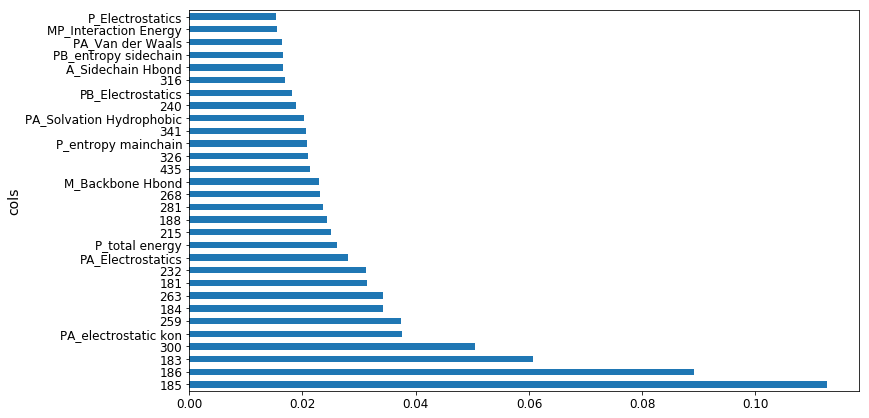

In [1453]:
plot_fi(fi[:30]);

### Peptide accounts for 63 % of feature importance with all features

In [1454]:
fi[0:10].imp.sum()

0.5191298849849411

In [1455]:
print("Number of features that have an importance:")
print(len(fi) - sum(fi.imp == 0))

Number of features that have an importance:
36


In [1456]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

36

In [1457]:
fi[fi.imp>0.003].cols

0                          185
1                          186
2                          183
3                          300
7         PA_electrostatic kon
4                          259
8                          184
11                         263
6                          181
5                          232
10           PA_Electrostatics
9               P_total energy
22                         215
14                         188
29                         281
19                         268
13            M_Backbone Hbond
15                         435
23                         326
20         P_entropy mainchain
27                         341
18    PA_Solvation Hydrophobic
12                         240
17           PB_Electrostatics
34                         316
24           A_Sidechain Hbond
30        PB_entropy sidechain
16            PA_Van der Waals
28       MP_Interaction Energy
32            P_Electrostatics
25                         205
26                         189
21      

In [1458]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

### Removing features and testing accuracy

In [1459]:
m = RandomForestRegressor(n_estimators=120, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.037503035699835034, 0.20931326911257614, 0.9898998311868491, 0.6803438861655773, 0.8838920902291598]
MCC: 0.7630149283086916
AP: 0.6864754098360656
True positive rate: 0.625
True negative rate: 1.0
Confusion matrix:
 [[204   0]
 [ 15  25]]
tn, fp, fn, tp


### Number of features that have any importance: 234 / 469. Removing features < 0.005 importance -> to 38 reduces accuracy from ca 93 -> 89 %

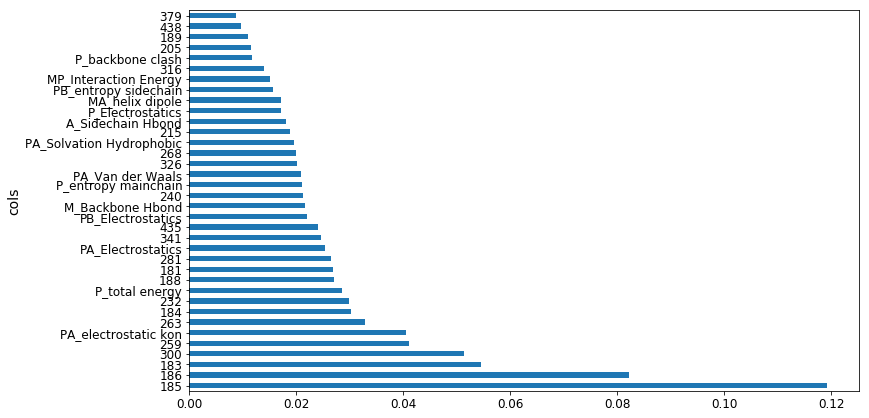

In [1460]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi[:]);

In [1461]:
df_keep.shape, df.shape

((1464, 36), (1464, 730))

### Removing co-dependent features?

In [1462]:
from scipy.cluster import hierarchy as hc

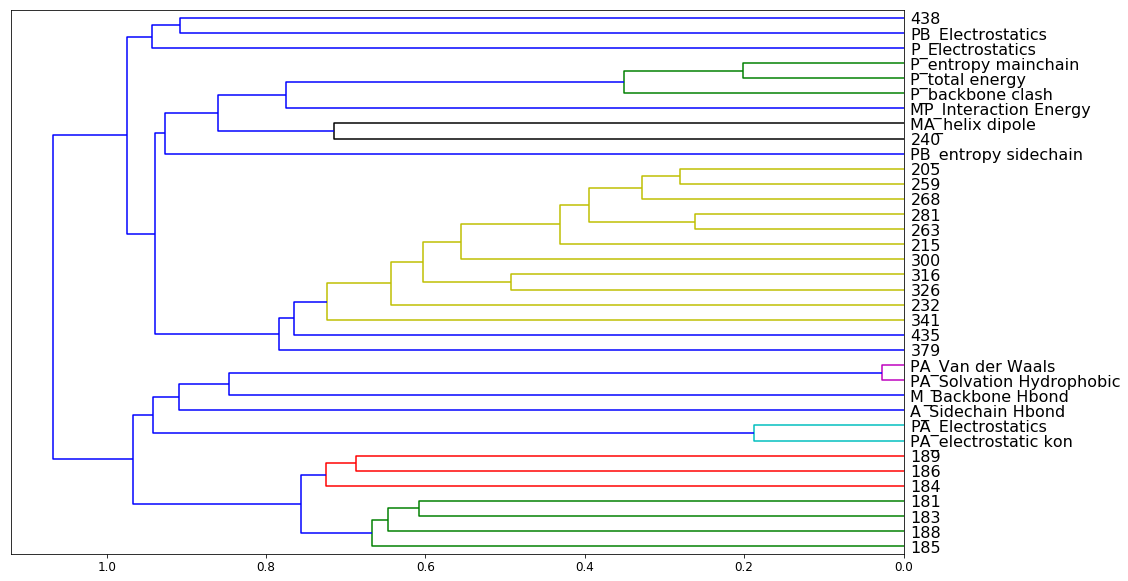

In [1463]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

Amino acid do not depend on each other. Thus no need for removal

# 
# Partial dependence
# 

In [1464]:
from pdpbox import pdp
from plotnine import *

In [1465]:
df_trn2, y_trn = df, y
X_train, X_valid = split_vals(df_trn2, n_trn)
m = RandomForestRegressor(n_estimators=120, max_features=0.5, n_jobs=-1)
m.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

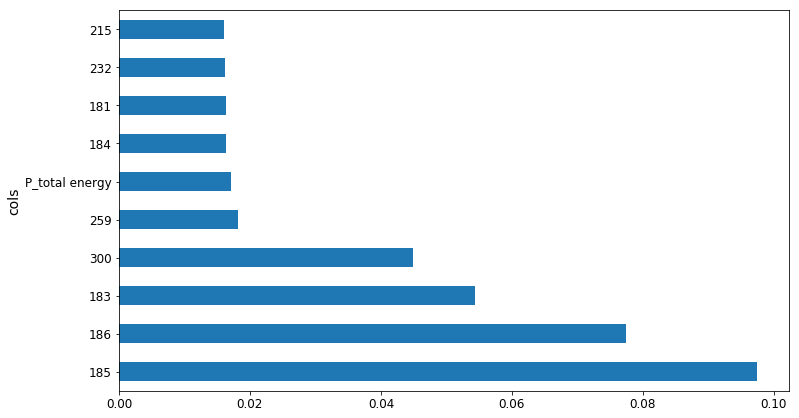

In [1466]:
plot_fi(rf_feat_importance(m, df_trn2)[:10]);

In [1467]:
x.plot('185', 'pred', 'scatter', alpha=0.1, figsize=(10,8));

KeyError: 'pred'

In [1468]:
x.plot('185', 'y_true', 'scatter', alpha=0.1, figsize=(10,8));

KeyError: 'y_true'

In [549]:
x_all = get_sample(df_raw, 500)

In [576]:
from skmisc import *
import sys
sys.path.insert(0, "/usr/local/anaconda3/lib/python3.6/site-packages")

In [1469]:
fi[0:10]

cols       imp
0                    185  0.119153
1                    186  0.082148
2                    183  0.054493
3                    300  0.051398
5                    259  0.041136
4   PA_electrostatic kon  0.040585
7                    263  0.032781
6                    184  0.030307
9                    232  0.029947
11        P_total energy  0.028493

In [1470]:
ggplot(x_all, aes('185', 'y_true'))+stat_smooth(se=True, method='loess')

NameError: name 'x_all' is not defined

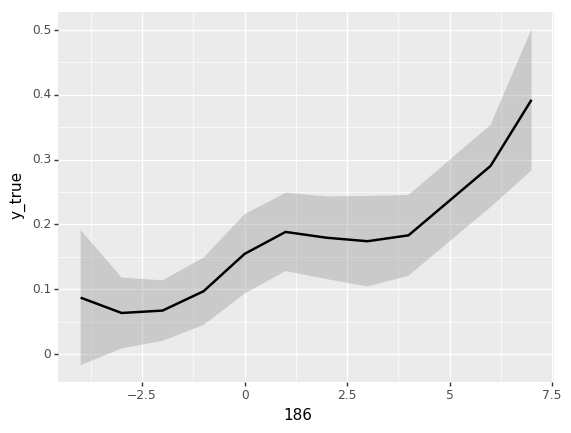

<ggplot: (-9223363270540941971)>

In [586]:
ggplot(x_all, aes('186', 'y_true'))+stat_smooth(se=True, method='loess')

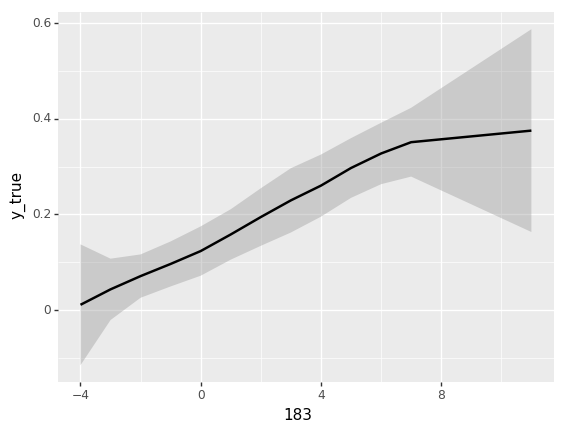

<ggplot: (-9223363270555590284)>

In [587]:
ggplot(x_all, aes('183', 'y_true'))+stat_smooth(se=True, method='loess')

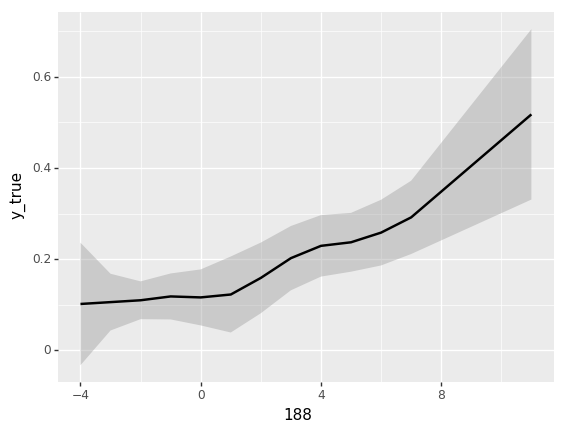

<ggplot: (-9223363270540634908)>

In [588]:
ggplot(x_all, aes('188', 'y_true'))+stat_smooth(se=True, method='loess')

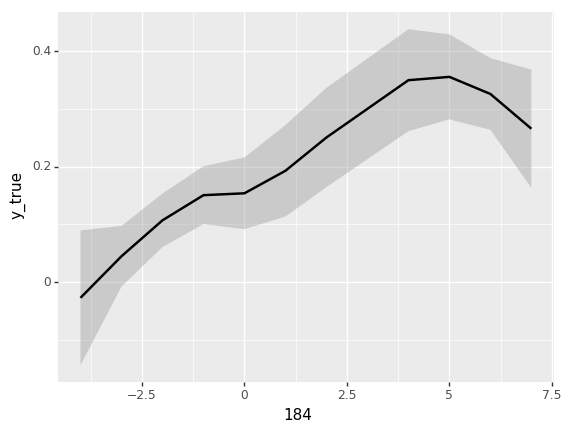

<ggplot: (8766299185640)>

In [589]:
ggplot(x_all, aes('184', 'y_true'))+stat_smooth(se=True, method='loess')

(500, 469)

In [1471]:
x = get_sample(X_train, 400)

In [1472]:
pdp.pdp_isolate

<function pdpbox.pdp.pdp_isolate(model, dataset, model_features, feature, num_grid_points=10, grid_type='percentile', percentile_range=None, grid_range=None, cust_grid_points=None, memory_limit=0.5, n_jobs=1, predict_kwds=None, data_transformer=None)>

In [1473]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, x.columns, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa9ae943b00>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa9ae8a4fd0>})

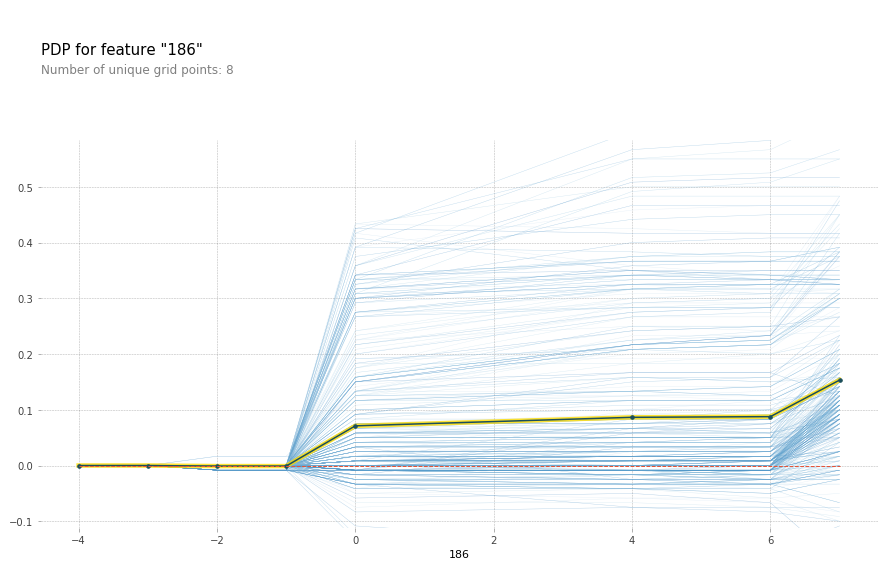

In [1474]:
plot_pdp("186")

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa9ad261358>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa9ad20eb70>})

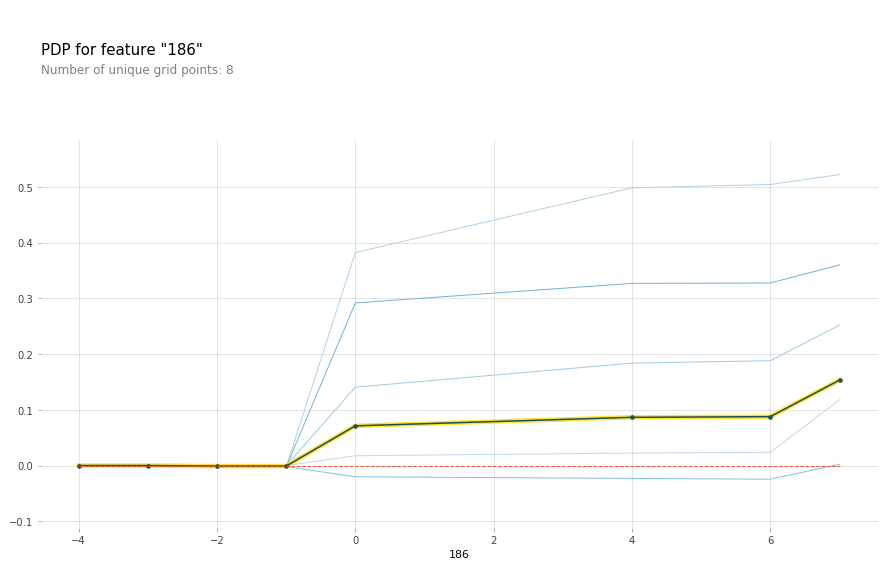

In [1475]:
plot_pdp('186', clusters=5)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f90b6d0ca20>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f90b741a0b8>})

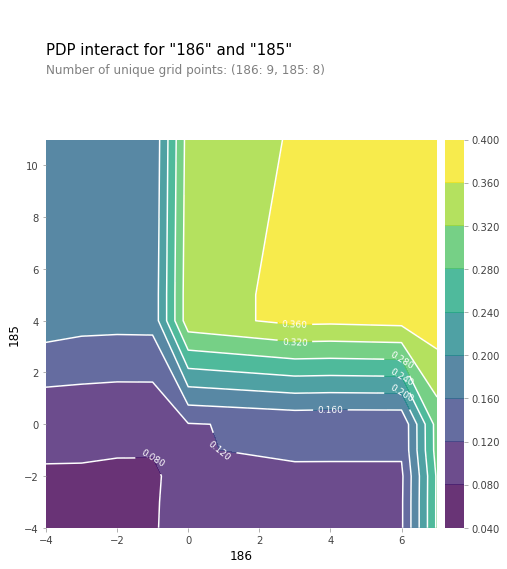

In [650]:
feats = ['186', '185']
p = pdp.pdp_interact(m, x, x.columns, feats)
pdp.pdp_interact_plot(p, feats)

### Tree interpreter

In [1809]:
df_keep.shape

(1464, 36)

1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.036545222378424884, 0.21987302802238018, 0.9904091520958779, 0.647277301198257]
MCC: 0.6900048724234678
AP: 0.598672131147541
True positive rate: 0.575
True negative rate: 0.9901960784313726
Confusion matrix:
 [[202   2]
 [ 17  23]]
tn, fp, fn, tp


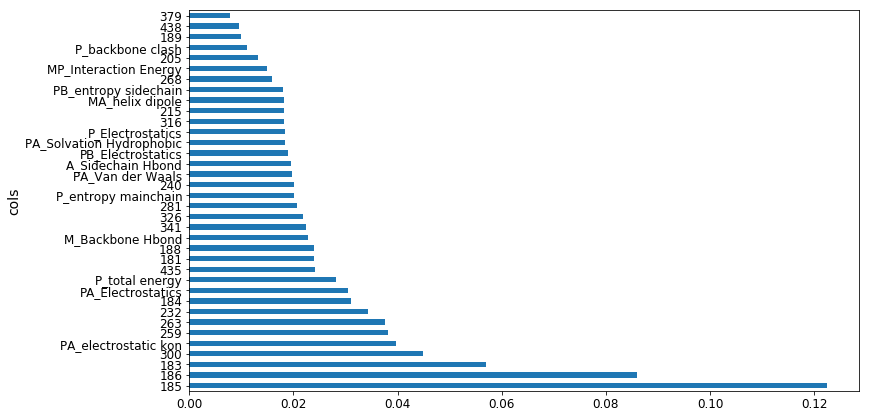

In [1807]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=120, max_features=0.5, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)
plot_fi(rf_feat_importance(m, df_keep));

In [1477]:
from treeinterpreter import treeinterpreter as ti

In [1481]:
df_raw_all

0  1  2  3  4  5  6  7  8  9  ...  459  460  461  \
key_0                                                     ...                  
1g6r_1p_P1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6   -1    6   
1g6r_1p_N1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6   -1    6   
1g6r_1p_N2_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6   -1    6   
1g6r_1p_N3_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6   -1    6   
1g6r_1p_R1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6   -1    6   
1g6r_1p_S1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6   -1    6   
1g6r_1p_P1_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    4    6   
1g6r_1p_N1_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    4    6   
1g6r_1p_N2_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    4    6   
1g6r_1p_N3_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    4    6   
1g6r_1p_R1_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    4    6   
1g6r_1p_S1_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    4    6   
1g6r_1p_P1_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    4    6   
1g6r_1p_N1_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    4    6   
1g6r_1p_N2_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    4    6   
1g6r_1p_N3_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    4    6   
1g6r_1p_R1_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    4    6   
1g6r_1p_S1_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    4    6   
1g6r_1p_P1_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    4    6   
1g6r_1p_N1_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    4    6   
1g6r_1p_N2_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    4    6   
1g6r_1p_N3_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    4    6   
1g6r_1p_R1_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    4    6   
1g6r_1p_S1_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    4    6   
1mwa_1p_P1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6   -1    6   
1mwa_1p_N1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6   -1    6   
1mwa_1p_N2_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6   -1    6   
1mwa_1p_N3_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6   -1    6   
1mwa_1p_R1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6   -1    6   
1mwa_1p_S1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6   -1    6   
...                        .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...   
5hho_4p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    7    6   
5hho_4p_N1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    7    6   
5hho_4p_N2_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    7    6   
5hho_4p_N3_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    7    6   
5hho_4p_R1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    7    6   
5hho_4p_S1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    7    6   
5men_0p_P1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    2    6   
5men_0p_N1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    2    6   
5men_0p_N2_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    2    6   
5men_0p_N3_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    2    6   
5men_0p_R1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    0    6   
5men_0p_S1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    4    6   
5men_0p_P1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    2    6   
5men_0p_N1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    2    6   
5men_0p_N2_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    2    6   
5men_0p_N3_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    2    6   
5men_0p_R1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    0    6   
5men_0p_S1_1t_90s_pMHC-TCR  

In [1482]:
df_train, df_valid = split_vals(df_raw_all[df_keep.columns], n_trn)

In [1556]:
y_valid

key_0
5c0c_1p_N2_1t_99s_pMHC-TCR    0.0
5c0c_1p_N3_1t_99s_pMHC-TCR    0.0
5c0c_1p_R1_1t_99s_pMHC-TCR    0.0
5c0c_1p_S1_1t_99s_pMHC-TCR    0.0
5c07_1p_P1_1t_80s_pMHC-TCR    1.0
5c07_1p_N1_1t_80s_pMHC-TCR    0.0
5c07_1p_N2_1t_80s_pMHC-TCR    0.0
5c07_1p_N3_1t_80s_pMHC-TCR    0.0
5c07_1p_R1_1t_80s_pMHC-TCR    0.0
5c07_1p_S1_1t_80s_pMHC-TCR    0.0
5c07_1p_P1_1t_90s_pMHC-TCR    1.0
5c07_1p_N1_1t_90s_pMHC-TCR    0.0
5c07_1p_N2_1t_90s_pMHC-TCR    0.0
5c07_1p_N3_1t_90s_pMHC-TCR    0.0
5c07_1p_R1_1t_90s_pMHC-TCR    0.0
5c07_1p_S1_1t_90s_pMHC-TCR    0.0
5c07_1p_P1_1t_95s_pMHC-TCR    1.0
5c07_1p_N1_1t_95s_pMHC-TCR    0.0
5c07_1p_N2_1t_95s_pMHC-TCR    0.0
5c07_1p_N3_1t_95s_pMHC-TCR    0.0
5c07_1p_R1_1t_95s_pMHC-TCR    0.0
5c07_1p_S1_1t_95s_pMHC-TCR    0.0
5c07_1p_P1_1t_99s_pMHC-TCR    1.0
5c07_1p_N1_1t_99s_pMHC-TCR    0.0
5c07_1p_N2_1t_99s_pMHC-TCR    0.0
5c07_1p_N3_1t_99s_pMHC-TCR    0.0
5c07_1p_R1_1t_99s_pMHC-TCR    0.0
5c07_1p_S1_1t_99s_pMHC-TCR    0.0
5c08_1p_P1_1t_80s_pMHC-TCR    1.0
5c08_1p_

In [1517]:
y_valid.values

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1.

In [1555]:
row = X_valid.values[None,10]; row
prediction, bias, contributions = ti.predict(m, row)
print("Prediction: ", prediction[0], " Start bias: ", bias[0])
print("Total contribution", contributions[0].sum())
print("\nAll contributing terms:")
idxs = np.argsort(contributions[0])
[o for o in zip(df_keep.columns[idxs], df_valid.iloc[0][idxs], np.around(contributions[0][idxs], 5))]

Prediction:  [0.975]  Start bias:  0.16667805100182148
Total contribution 0.8083219489981784

All contributing terms:


[('181', -1.0, -0.02842),
 ('P_Electrostatics', -0.0742825, -0.0085),
 ('188', -2.0, -0.00742),
 ('189', 0.0, -0.00464),
 ('326', 4.0, -0.00182),
 ('M_Backbone Hbond', -132.38, -0.0005),
 ('MA_helix dipole', -0.029689499999999997, 0.00016),
 ('379', 4.0, 0.00073),
 ('A_Sidechain Hbond', -25.7646, 0.00143),
 ('P_backbone clash', 0.798953, 0.0015),
 ('P_entropy mainchain', 7.17742, 0.00167),
 ('P_total energy', 8.67419, 0.0017),
 ('PA_Solvation Hydrophobic', -2.0893900000000003, 0.002),
 ('PB_Electrostatics', -0.126906, 0.00329),
 ('MP_Interaction Energy', -3.7876199999999995, 0.00424),
 ('PA_Van der Waals', -1.92143, 0.00594),
 ('PB_entropy sidechain', 4.51627, 0.00596),
 ('341', 5.0, 0.00749),
 ('205', 7.0, 0.0085),
 ('435', 4.0, 0.00895),
 ('240', 5.0, 0.0101),
 ('316', 5.0, 0.0144),
 ('268', 5.0, 0.01894),
 ('PA_Electrostatics', 0.320389, 0.02043),
 ('438', 5.0, 0.02432),
 ('PA_electrostatic kon', 0.034382199999999995, 0.02777),
 ('259', 6.0, 0.028),
 ('215', 5.0, 0.03113),
 ('184', 

In [1554]:
row = X_valid.values[None,0]; row
prediction, bias, contributions = ti.predict(m, row)
print("Prediction: ", prediction[0], " Start bias: ", bias[0])
print("Total contribution", contributions[0].sum())
print("\nAll contributing terms:")
idxs = np.argsort(contributions[0])
[o for o in zip(df_keep.columns[idxs], df_valid.iloc[0][idxs], np.around(contributions[0][idxs], 5))]

Prediction:  [0.]  Start bias:  0.16667805100182148
Total contribution -0.16667805100182145

All contributing terms:


[('185', -1.0, -0.04835),
 ('183', 0.0, -0.03276),
 ('186', -3.0, -0.0127),
 ('181', -1.0, -0.01004),
 ('326', 4.0, -0.00999),
 ('P_total energy', 8.67419, -0.00928),
 ('184', -1.0, -0.00798),
 ('188', -2.0, -0.00614),
 ('P_entropy mainchain', 7.17742, -0.00532),
 ('M_Backbone Hbond', -132.38, -0.00422),
 ('PA_electrostatic kon', 0.034382199999999995, -0.0033),
 ('341', 5.0, -0.00299),
 ('263', 6.0, -0.00227),
 ('A_Sidechain Hbond', -25.7646, -0.00204),
 ('435', 4.0, -0.00162),
 ('P_backbone clash', 0.798953, -0.0016),
 ('MA_helix dipole', -0.029689499999999997, -0.0015),
 ('PA_Solvation Hydrophobic', -2.0893900000000003, -0.00126),
 ('205', 7.0, -0.00073),
 ('PA_Van der Waals', -1.92143, -0.0004),
 ('316', 5.0, -0.00039),
 ('PA_Electrostatics', 0.320389, -0.00033),
 ('PB_entropy sidechain', 4.51627, -0.00032),
 ('PB_Electrostatics', -0.126906, -0.00025),
 ('281', 4.0, -0.00021),
 ('240', 5.0, -0.0002),
 ('MP_Interaction Energy', -3.7876199999999995, -0.00011),
 ('232', 5.0, -0.0001),


In [1563]:
df_keep.columns

Index(['185', '186', '183', '300', 'PA_electrostatic kon', '259', '184', '263',
       '181', '232', 'PA_Electrostatics', 'P_total energy', '215', '188',
       '281', '268', 'M_Backbone Hbond', '435', '326', 'P_entropy mainchain',
       '341', 'PA_Solvation Hydrophobic', '240', 'PB_Electrostatics', '316',
       'A_Sidechain Hbond', 'PB_entropy sidechain', 'PA_Van der Waals',
       'MP_Interaction Energy', 'P_Electrostatics', '205', '189',
       'MA_helix dipole', 'P_backbone clash', '379', '438'],
      dtype='object')

# 
# Plotting contributions
# 

#### Negative and positive complex generation:
- N = Negative with high % identity peptide
- R = Negative with low rank % identity peptide
- S = Negative with same peptide, switched TCR
- P = Positive complex

In [1705]:
df_valid

185  186  183  300  PA_electrostatic kon  259  \
key_0                                                                       
5c0c_1p_N2_1t_99s_pMHC-TCR   -1   -3    0    5              0.034382    6   
5c0c_1p_N3_1t_99s_pMHC-TCR   -1   -1    6    5             -0.020810    6   
5c0c_1p_R1_1t_99s_pMHC-TCR   -1    6   -3    5             -0.097130    6   
5c0c_1p_S1_1t_99s_pMHC-TCR    7    6    6   -1              0.055961   -3   
5c07_1p_P1_1t_80s_pMHC-TCR   -3   -1   -2    0             -0.101645    1   
5c07_1p_N1_1t_80s_pMHC-TCR   -3   -4   -2    0              0.144431    1   
5c07_1p_N2_1t_80s_pMHC-TCR   -3   -2   -1    0             -0.021204    1   
5c07_1p_N3_1t_80s_pMHC-TCR    2    6   -2    0             -0.201444    1   
5c07_1p_R1_1t_80s_pMHC-TCR   -3   -1    1    0              0.003095    1   
5c07_1p_S1_1t_80s_pMHC-TCR   -3   -1   -2    1             -0.009260   -3   
5c07_1p_P1_1t_90s_pMHC-TCR    7    6    6    5             -0.101645    6   
5c07_1p_N1_1t_90s_pMHC-TCR   -1   -4    2    5              0.144431    6   
5c07_1p_N2_1t_90s_pMHC-TCR   -1   -1   -3    5             -0.021204    6   
5c07_1p_N3_1t_90s_pMHC-TCR   -3   -1   -4    5             -0.201444    6   
5c07_1p_R1_1t_90s_pMHC-TCR   -1    6   -3    5              0.003095    6   
5c07_1p_S1_1t_90s_pMHC-TCR    7    6   -3   -1             -0.004512   -3   
5c07_1p_P1_1t_95s_pMHC-TCR    7    6    6    5             -0.079259    6   
5c07_1p_N1_1t_95s_pMHC-TCR   -1   -4    2    5              0.144431    6   
5c07_1p_N2_1t_95s_pMHC-TCR   -1   -1    0    5             -0.025402    6   
5c07_1p_N3_1t_95s_pMHC-TCR   -3   -1   -4    5             -0.201444    6   
5c07_1p_R1_1t_95s_pMHC-TCR   -1    6   -3    5              0.003095    6   
5c07_1p_S1_1t_95s_pMHC-TCR    7    6    6   -1              0.000000   -3   
5c07_1p_P1_1t_99s_pMHC-TCR    7    6    6    5             -0.075718    6   
5c07_1p_N1_1t_99s_pMHC-TCR   -1   -4    2    5             -0.121176    6   
5c07_1p_N2_1t_99s_pMHC-TCR   -1   -1    0    5              0.041553    6   
5c07_1p_N3_1t_99s_pMHC-TCR   -3   -1   -4    5             -0.074414    6   
5c07_1p_R1_1t_99s_pMHC-TCR   -1    6   -3    5             -0.097130    6   
5c07_1p_S1_1t_99s_pMHC-TCR    7    6    6   -1             -0.022064   -3   
5c08_1p_P1_1t_80s_pMHC-TCR   -3   -1   -3    0             -0.334402    1   
5c08_1p_N1_1t_80s_pMHC-TCR   -3   -3   -1    0             -0.030047    1   
...                         ...  ...  ...  ...                   ...  ...   
5hho_4p_P1_1t_99s_pMHC-TCR    6    4    4    4             -0.106838    4   
5hho_4p_N1_1t_99s_pMHC-TCR   -1   -2   -1    4              0.005064    4   
5hho_4p_N2_1t_99s_pMHC-TCR   -1    0   -4    4              0.114143    4   
5hho_4p_N3_1t_99s_pMHC-TCR    4    0   -2    4              0.018421    4   
5hho_4p_R1_1t_99s_pMHC-TCR   -3    4    0    4             -0.129564    4   
5hho_4p_S1_1t_99s_pMHC-TCR    6    4    4   -1             -0.082815   -3   
5men_0p_P1_1t_80s_pMHC-TCR    1    2   -1   -2             -0.225553   -1   
5men_0p_N1_1t_80s_pMHC-TCR   -2   -2   -3   -2              0.209695   -1   
5men_0p_N2_1t_80s_pMHC-TCR   -3   -1   -4   -2             -0.116507   -1   
5men_0p_N3_1t_80s_pMHC-TCR   -3    4    1   -2              0.198182   -1   
5men_0p_R1_1t_80s_pMHC-TCR   -2    4   -1    1              0.472856   -1   
5men_0p_S1_1t_80s_pMHC-TCR    0    1    0    6              0.002387    5   
5men_0p_P1_1t_90s_pMHC-TCR    1    2   -1   -2             -0.031887   -1   
5men_0p_N1_1t_90s_pMHC-TCR   -2   -2   -3   -2              0.080066   -1   
5men_0p_N2_1t_90s_pMHC-TCR   -3   -1   -4   -2             -0.068816   -1   
5men_0p_N3_1t_90s_pMHC-TCR   -3    4    1   -2              0.085694   -1   
5men_0p_R1_1t_90s_pMHC-TCR   -2    4   -1    1              0.334137   -1   
5men_0p_S1_1t_90s_pMHC-TCR    0    1    0    6              0.020046    5   
5men_0p_P1_1t_95s_pMHC-TCR    1    2   -1   -2             -0.198113   -1   
5men_0p_N1_1t_95s_pMHC-T

In [1814]:
row = X_valid.values[None,0]; row
prediction, bias, contributions = ti.predict(m, row)
print("Prediction: ", prediction[0], " Start bias: ", bias[0])
print("Total contribution", contributions[0].sum())
print("\nAll contributing terms:")
a = pd.DataFrame([o for o in zip(df_keep.columns, df_valid.iloc[0], np.around(contributions[0], 5))])

Prediction:  [0.]  Start bias:  0.16873861566484516
Total contribution -0.16873861566484516

All contributing terms:


In [1666]:
row = X_valid.values[None,0]; row
prediction, bias, contributions = ti.predict(m, row)
a = pd.DataFrame([o for o in zip(df_keep.columns, np.around(contributions[0], 5))])

In [1667]:
a = a.rename(columns={0: "feature", 1: "0"})

In [ ]:
a = pd.DataFrame(a[0])

In [1669]:
for i in range(1, 5):
    row = X_valid.values[None,i];
    prediction, bias, contributions = ti.predict(m, row)
    b = pd.DataFrame(np.around(contributions[0], 5))
    a[str(i)] = b

# Average contribution chart:
### Creating averages for all pos, high %ID, low %ID, switch TCR groups

In [1947]:
df_pos = pd.DataFrame(df_keep.columns)
df_low = pd.DataFrame(df_keep.columns)
df_high = pd.DataFrame(df_keep.columns)
df_switch = pd.DataFrame(df_keep.columns)

In [1948]:
#get positives
df_pos = pd.DataFrame(df_keep.columns)

for i in range(4, 244, 6):
    row = X_valid.values[None,i];
    prediction, bias, contributions = ti.predict(m, row)
    b = pd.DataFrame(np.around(contributions[0], 5))
    df_pos[str(i)] = b

In [1949]:
#get switch TCR
df_switch = pd.DataFrame(df_keep.columns)

for i in range(3, 244, 6):
    row = X_valid.values[None,i];
    prediction, bias, contributions = ti.predict(m, row)
    b = pd.DataFrame(np.around(contributions[0], 5))
    df_switch[str(i)] = b

In [1950]:
#get low ID
df_low = pd.DataFrame(df_keep.columns)

for i in range(2, 244, 6):
    row = X_valid.values[None,i];
    prediction, bias, contributions = ti.predict(m, row)
    b = pd.DataFrame(np.around(contributions[0], 5))
    df_low[str(i)] = b

In [1951]:
#get high ID first time
df_high = pd.DataFrame(df_keep.columns)

for i in range(1, 244, 6):
    row = X_valid.values[None,i];
    prediction, bias, contributions = ti.predict(m, row)
    b = pd.DataFrame(np.around(contributions[0], 5))
    df_high[str(i)] = b

In [1952]:
#get high ID second time
#df_high = pd.DataFrame(df_keep.columns)

for i in range(0, 244, 6):
    row = X_valid.values[None,i];
    prediction, bias, contributions = ti.predict(m, row)
    b = pd.DataFrame(np.around(contributions[0], 5))
    df_high[str(i)] = b

In [1954]:
df_pos = df_pos.set_index(df_pos.iloc[:,0]).drop(0, axis = 1)
df_high = df_high.set_index(df_high.iloc[:,0]).drop(0, axis = 1)
df_low = df_low.set_index(df_low.iloc[:,0]).drop(0, axis = 1)
df_switch = df_switch.set_index(df_switch.iloc[:,0]).drop(0, axis = 1)
df_high

1        7       13       19       25  \
0                                                                       
185                      -0.06453  0.14791 -0.06707 -0.06707 -0.06707   
186                      -0.07503  0.11407 -0.01191 -0.01191 -0.01191   
183                       0.03796 -0.10697 -0.02220 -0.02220 -0.02220   
300                      -0.00026 -0.03550  0.00000  0.00000 -0.00007   
PA_electrostatic kon     -0.00266  0.07748  0.00877  0.00877 -0.00256   
259                      -0.00121 -0.01842  0.00000  0.00000  0.00000   
184                      -0.02960 -0.02410 -0.01288 -0.01288 -0.01115   
263                       0.00806  0.04133 -0.00220 -0.00220 -0.00223   
181                      -0.00306 -0.01164 -0.00618 -0.00618 -0.00618   
232                      -0.00192 -0.02755  0.00000  0.00000  0.00000   
PA_Electrostatics        -0.00024  0.04801  0.00243  0.00243  0.00199   
P_total energy           -0.01563 -0.00326 -0.00958 -0.00958 -0.01032   
215                       0.00223  0.01926 -0.00002 -0.00002 -0.00002   
188                       0.03387 -0.00794 -0.00607 -0.00607 -0.00503   
281                       0.00279  0.01827 -0.00027 -0.00027 -0.00028   
268                       0.00408  0.00100  0.00000  0.00000  0.00000   
M_Backbone Hbond         -0.01180  0.00714 -0.00421 -0.00421 -0.00460   
435                      -0.00674  0.00697 -0.00171 -0.00171 -0.00172   
326                      -0.01051 -0.00733 -0.00882 -0.00882 -0.00758   
P_entropy mainchain      -0.00798  0.00935 -0.01219 -0.01219 -0.00536   
341                      -0.00226 -0.02656 -0.00327 -0.00327 -0.00331   
PA_Solvation Hydrophobic -0.00096 -0.00235 -0.00097 -0.00097 -0.00102   
240                       0.00154 -0.03025 -0.00138 -0.00138 -0.00047   
PB_Electrostatics         0.00188 -0.00820  0.00000  0.00000  0.00000   
316                      -0.00375 -0.00417 -0.00010 -0.00010 -0.00013   
A_Sidechain Hbond         0.00726  0.00262 -0.00216 -0.00216 -0.00199   
PB_entropy sidechain      0.00045  0.00889 -0.00017 -0.00017 -0.00017   
PA_Van der Waals         -0.00019 -0.01383 -0.00050 -0.00050 -0.00049   
MP_Interaction Energy    -0.00029  0.01683 -0.00039 -0.00039 -0.00039   
P_Electrostatics         -0.00004 -0.00030  0.00000  0.00000  0.00000   
205                      -0.00172  0.01636 -0.00068 -0.00068 -0.00068   
189                      -0.00772  0.00431 -0.00086 -0.00086 -0.00059   
MA_helix dipole           0.00225 -0.00077 -0.00190 -0.00190 -0.00152   
P_backbone clash         -0.00364 -0.00409 -0.00177 -0.00177 -0.00166   
379                      -0.00063 -0.00152  0.00000  0.00000  0.00000   
438                       0.00627 -0.00713 -0.00048 -0.00048  0.00000   

                               31       37       43       49       55  ...  \
0                                                                      ...   
185                       0.09831 -0.07421 -0.07358 -0.07358 -0.06344  ...   
186                      -0.10122  0.01181  0.00604  0.00604 -0.01439  ...   
183                      -0.10676 -0.03355 -0.03698 -0.03619 -0.02220  ...   
300                       0.10095 -0.00024 -0.00024 -0.00024 -0.00008  ...   
PA_electrostatic kon      0.01748  0.00911  0.07359  0.07155 -0.00263  ...   
259                      -0.01209  0.00314  0.00314  0.00314  0.00000  ...   
184                       0.01774 -0.01156 -0.01610 -0.01059 -0.01229  ...   
263                      -0.01178 -0.00091  0.00249  0.00247 -0.00221  ...   
181                       0.04418  0.02449  0.03142  0.03142 -0.00641  ...   
232                      -0.00347  0.00118  0.00118  0.00118  0.00000  ...   
PA_Electrostatics         0.03895  0.00310  0.00168  0.00106  0.00272  ...   
P_total energy           -0.00710 -0.00926 -0.00748 -0.00825 -0.01072  ...   
215                      -0.00862  0.00536  0.00538  0.00538 -0.00002  ...   
188                      -0.00700 -0.00956  0.15302  0.15302 -0.00374  ...   
281      

In [ ]:
df_pos.shape, df_switch.shape, df_low.shape, df_high.shape

#### Box chart?

In [1971]:
df_posm = pd.DataFrame(df_pos.mean(axis = 1))
df_highm = pd.DataFrame(df_high.mean(axis = 1))
df_lowm = pd.DataFrame(df_low.mean(axis = 1))
df_switchm = pd.DataFrame(df_switch.mean(axis = 1))
df_posm

0
0                                     
185                       8.065825e-02
186                       5.117875e-02
183                      -6.078000e-03
300                       1.960375e-02
PA_electrostatic kon      7.815250e-03
259                       7.353000e-03
184                       3.616675e-02
263                       2.802225e-02
181                       1.338100e-02
232                       4.901300e-02
PA_Electrostatics         1.667600e-02
P_total energy            3.805250e-03
215                       8.340000e-03
188                       8.555750e-03
281                       1.532575e-02
268                       1.792175e-02
M_Backbone Hbond         -1.294000e-03
435                       5.831750e-03
326                       6.859250e-03
P_entropy mainchain       3.184000e-03
341                       3.140750e-02
PA_Solvation Hydrophobic  2.158750e-03
240                       1.116375e-02
PB_Electrostatics        -3.646000e-03
316                      -5.857500e-04
A_Sidechain Hbond        -5.000000e-07
PB_entropy sidechain     -9.722500e-04
PA_Van der Waals          1.602500e-04
MP_Interaction Energy     4.756000e-03
P_Electrostatics          1.414500e-03
205                       1.075775e-02
189                       3.226000e-03
MA_helix dipole           1.581000e-03
P_backbone clash          3.959000e-03
379                       7.595000e-04
438                       9.674750e-03

In [1913]:
#df_posm = df_posm.reset_index().drop("index", axis = 1)
#df_highm = df_highm.reset_index().drop("index", axis = 1)
#df_lowm = df_lowm.reset_index().drop("index", axis = 1)
#df_switchm = df_switchm.reset_index().drop("index", axis = 1)

In [1974]:
df = pd.DataFrame({"Positive" : df_posm[0], "High ID" : df_highm[0], "Low ID" : df_lowm[0], "TCR switch" : df_switchm[0]})
df


Positive   High ID    Low ID  TCR switch
0                                                                     
185                       8.065825e-02 -0.042211 -0.074436    0.035306
186                       5.117875e-02 -0.010518 -0.004994    0.024490
183                      -6.078000e-03 -0.025068 -0.019169    0.001924
300                       1.960375e-02  0.004262 -0.000516    0.011170
PA_electrostatic kon      7.815250e-03 -0.000989  0.005467   -0.004761
259                       7.353000e-03 -0.003078 -0.000498   -0.015663
184                       3.616675e-02 -0.011353 -0.013205    0.028063
263                       2.802225e-02  0.001430 -0.000319   -0.041588
181                       1.338100e-02 -0.004359 -0.006890    0.008106
232                       4.901300e-02  0.000237 -0.000689   -0.040220
PA_Electrostatics         1.667600e-02 -0.001702  0.000813   -0.006180
P_total energy            3.805250e-03  0.002054 -0.003060   -0.002055
215                       8.340000e-03  0.002098 -0.000310   -0.016129
188                       8.555750e-03 -0.000561 -0.006571    0.002033
281                       1.532575e-02  0.000696 -0.000310   -0.016774
268                       1.792175e-02  0.000398 -0.000017   -0.011226
M_Backbone Hbond         -1.294000e-03 -0.003509 -0.004294    0.000710
435                       5.831750e-03  0.000653 -0.001378    0.000693
326                       6.859250e-03 -0.004266 -0.006537   -0.007722
P_entropy mainchain       3.184000e-03  0.002713 -0.005630   -0.002572
341                       3.140750e-02 -0.003821 -0.003171    0.024608
PA_Solvation Hydrophobic  2.158750e-03  0.001330 -0.001054   -0.001885
240                       1.116375e-02 -0.002403 -0.000524   -0.019695
PB_Electrostatics        -3.646000e-03  0.003569  0.000859   -0.001462
316                      -5.857500e-04 -0.000226 -0.001675   -0.001449
A_Sidechain Hbond        -5.000000e-07 -0.000733 -0.000218   -0.001764
PB_entropy sidechain     -9.722500e-04 -0.001255 -0.000028   -0.002303
PA_Van der Waals          1.602500e-04  0.001526 -0.000599   -0.004016
MP_Interaction Energy     4.756000e-03  0.000510  0.000153   -0.001303
P_Electrostatics          1.414500e-03 -0.000765  0.000231   -0.003584
205                       1.075775e-02 -0.000026 -0.000568   -0.008317
189                       3.226000e-03 -0.001960 -0.000619   -0.000790
MA_helix dipole           1.581000e-03 -0.002114 -0.001726   -0.001398
P_backbone clash          3.959000e-03 -0.000747 -0.002471    0.000242
379                       7.595000e-04 -0.000399 -0.000092   -0.004894
438                       9.674750e-03 -0.000767 -0.000052   -0.004799

### Average for all terms...

In [2007]:
pos = str(round(df["Positive"].sum(), 4))
high = str(round(df["High ID"].sum(), 4))
low = str(round(df["Low ID"].sum(), 4))
switch = str(round(df["TCR switch"].sum(), 4))

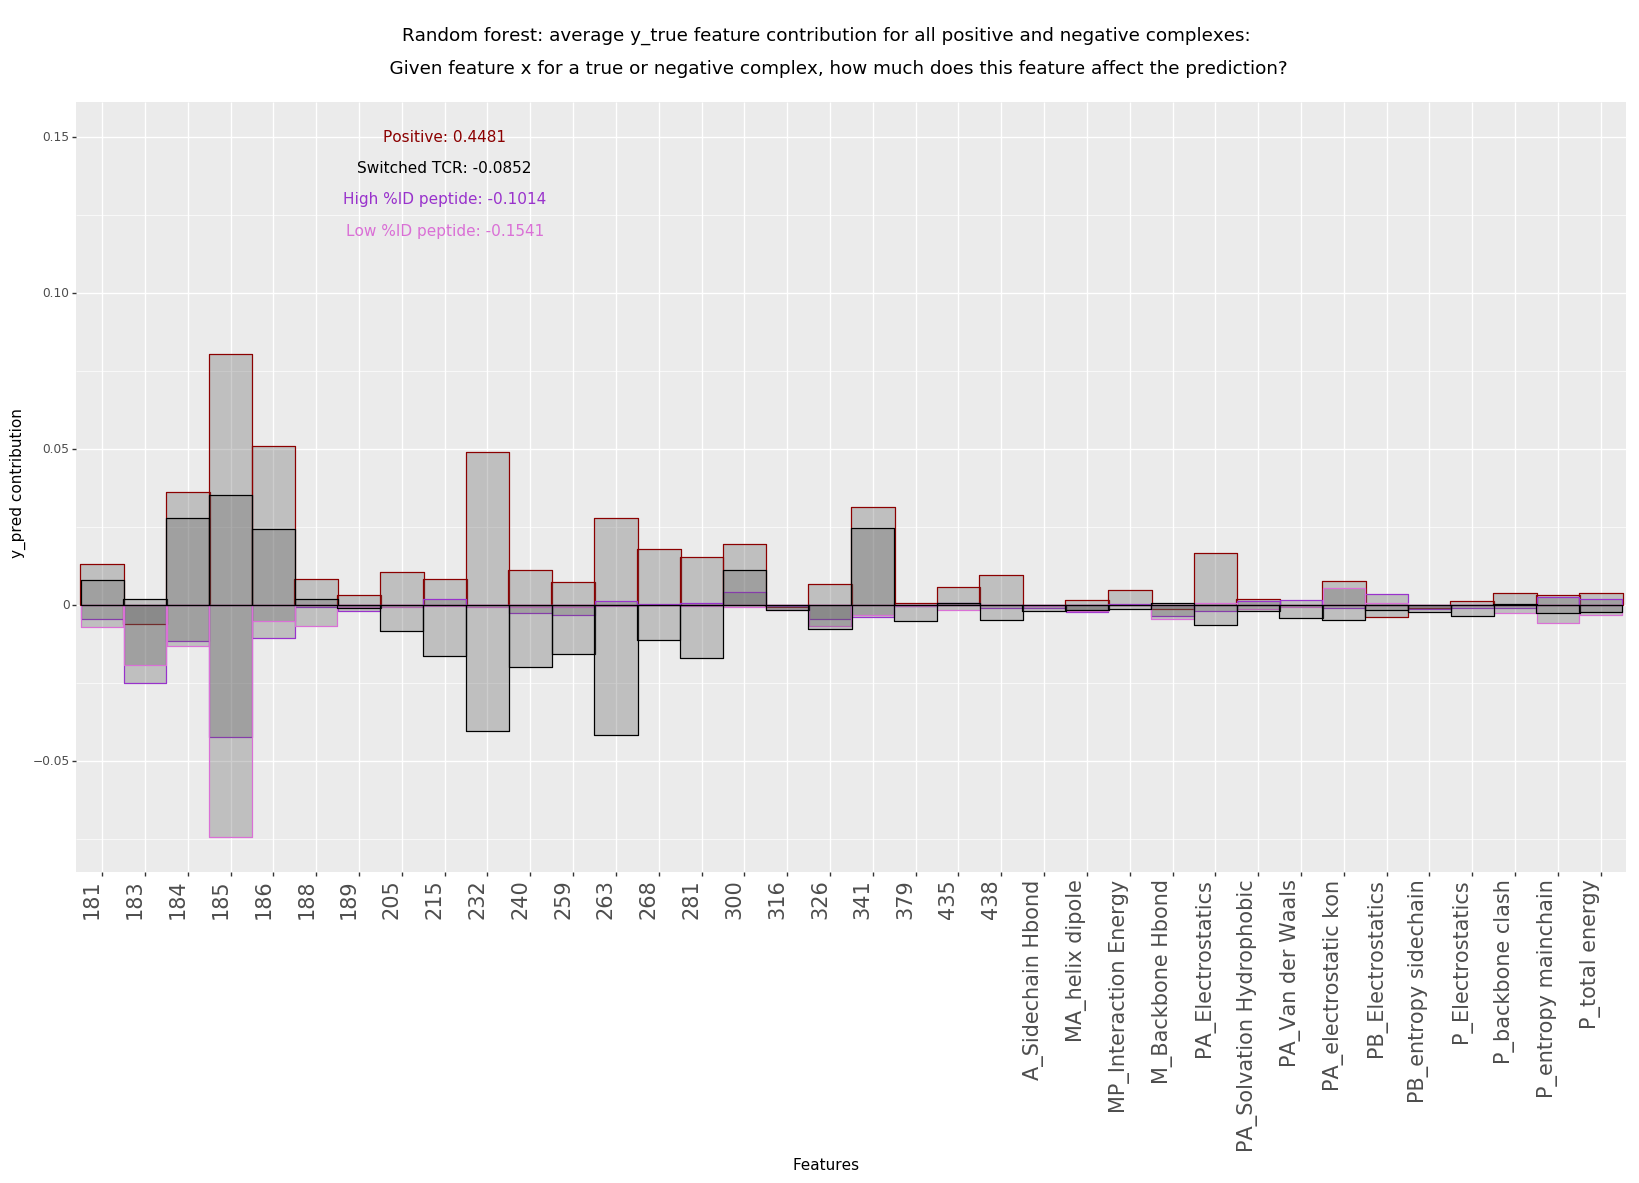

<ggplot: (8772891624014)>

In [2008]:
df = df
(ggplot(df, aes(df.index, "Positive"))
 #Plot values
    + geom_col(mapping = aes(df.index, "Positive"), color = "darkred", alpha = 0.3, width = 1.02)
    + geom_col(mapping = aes(df.index, "High ID"), color = "darkorchid", alpha = 0.3, width = 1.0)
    + geom_col(mapping = aes(df.index, "Low ID"), color = "orchid", alpha = 0.3, width = 0.99)
    + geom_col(mapping = aes(df.index, "TCR switch"), color = "black", alpha = 0.3, width = 1.01)
 
 #Colors
    + annotate("text", x = "215", y = 0.15, label = "Positive: " + pos, color = "darkred")
    + annotate("text", x = "215", y = 0.13, label = "High %ID peptide: " + high, color = "darkorchid")
    + annotate("text", x = "215", y = 0.12, label = "Low %ID peptide: " + low, color = "orchid")
    + annotate("text", x = "215", y = 0.14, label = "Switched TCR: " + switch, color = "black")


#    + annotate("text", x = "215", y = 0.11, label = "Some text", color = "red")
    + theme(figure_size =(20,10))
    + theme(axis_text_x=element_text(rotation=90, hjust=1, size = 15))
    + ggtitle("""\nRandom forest: average y_true feature contribution for all positive and negative complexes:\n
    Given feature x for a true or negative complex, how much does this feature affect the prediction?\n""")
    + xlab("Features")
    + ylab("y_pred contribution")
    + labs()
)

#### Old plot

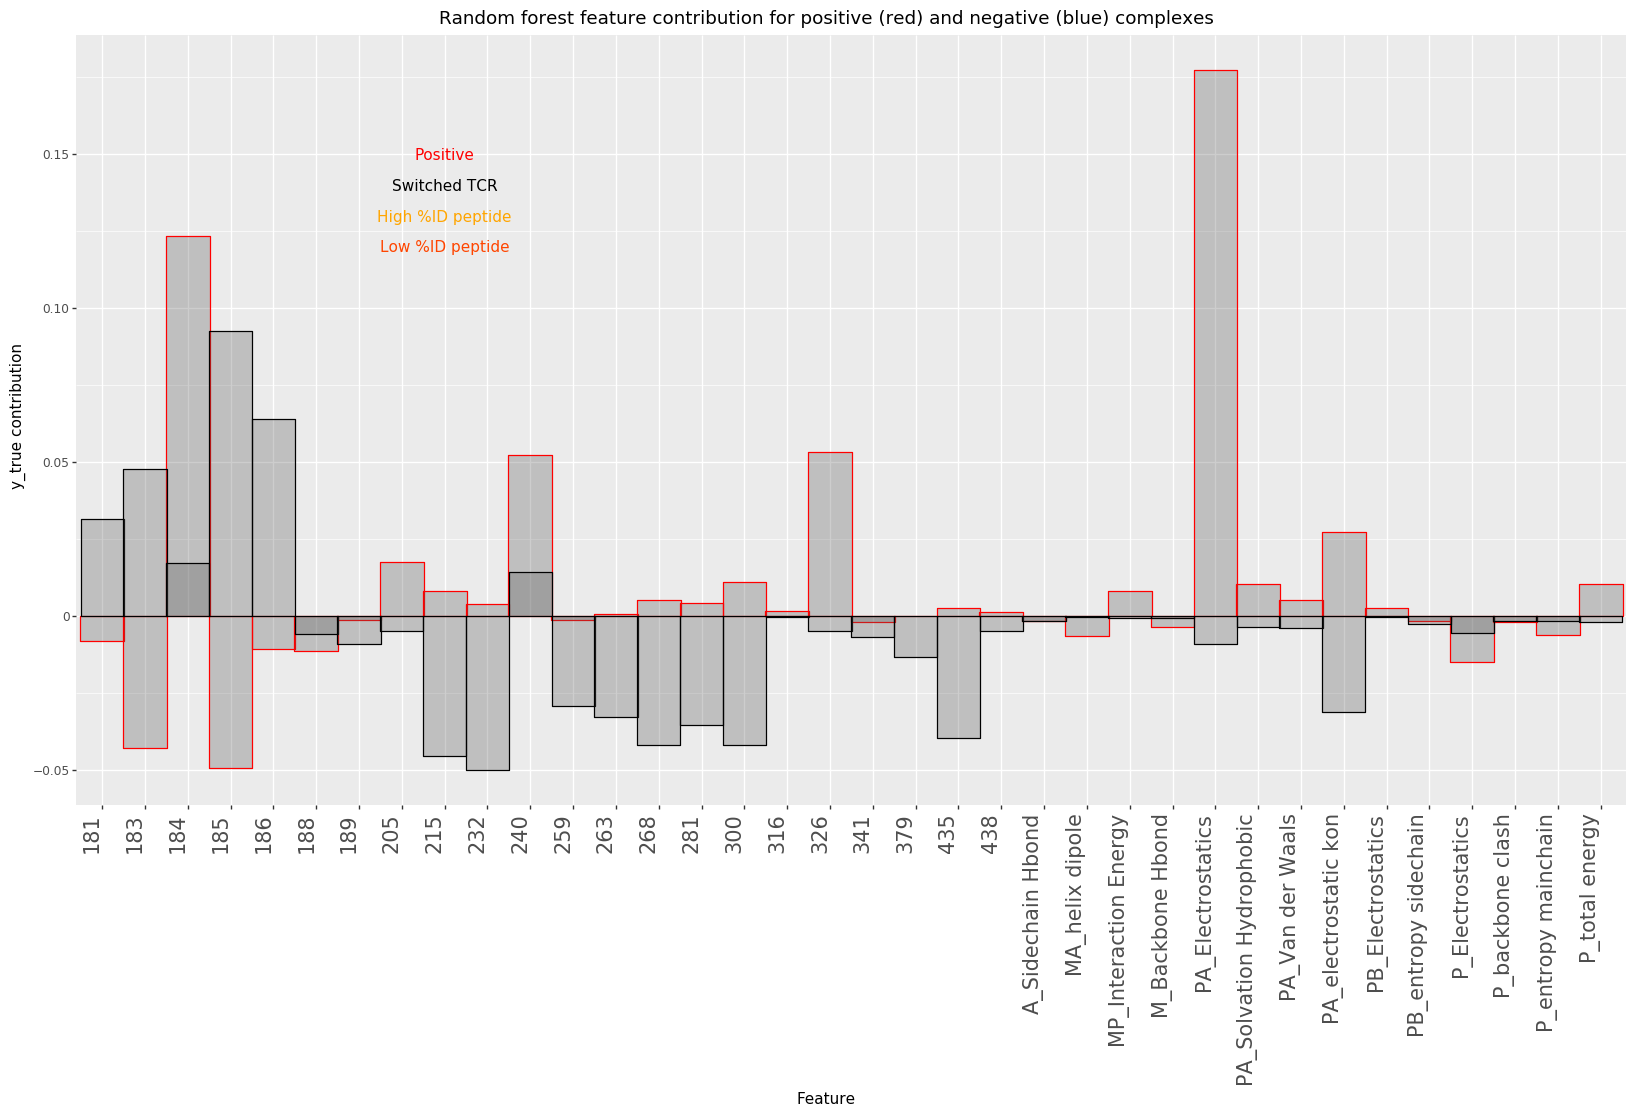

<ggplot: (8772865653838)>

In [1806]:
df = a
(ggplot(df, aes("feature", "4"))
 #Plot values
    + geom_col(mapping = aes("feature", "4"), color = "red", alpha = 0.3, width = 1.02)
    + geom_col(mapping = aes("feature", "3"), color = "black", alpha = 0.3, width = 1.01)
#    + geom_col(mapping = aes("feature", "0"), color = "orange", alpha = 0.3)
#    + geom_col(mapping = aes("feature", "1"), color = "orange", alpha = 0.3)
#    + geom_col(mapping = aes("feature", "2"), color = "orangered", alpha = 0.3)
 
 #Colors
    + annotate("text", x = "215", y = 0.15, label = "Positive", color = "red")
    + annotate("text", x = "215", y = 0.14, label = "Switched TCR", color = "black")
    + annotate("text", x = "215", y = 0.13, label = "High %ID peptide", color = "orange")
    + annotate("text", x = "215", y = 0.12, label = "Low %ID peptide", color = "orangered")

#    + annotate("text", x = "215", y = 0.11, label = "Some text", color = "red")
    + theme(figure_size =(20,10))
    + theme(axis_text_x=element_text(rotation=90, hjust=1, size = 15))
    + ggtitle("Random forest feature contribution for positive (red) and negative (blue) complexes")
    + xlab("Feature")
    + ylab("y_true contribution")
    + labs()
)

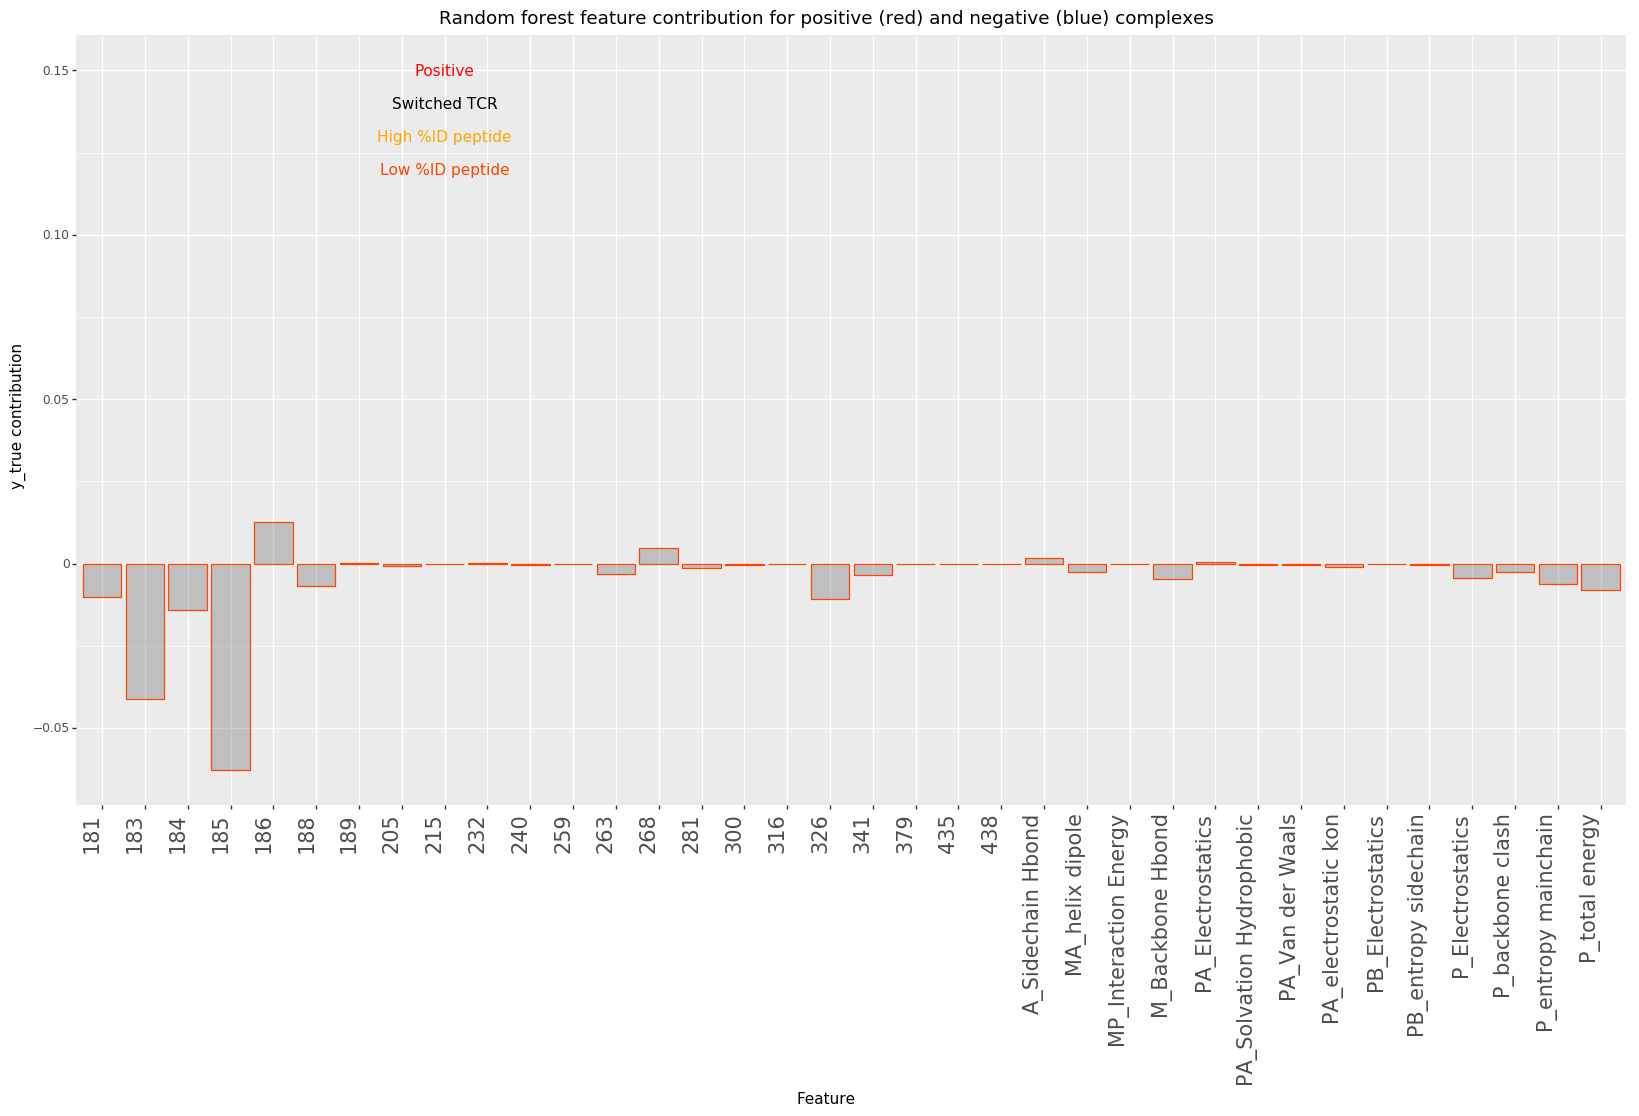

<ggplot: (8772891997097)>

In [1813]:
df = a
(ggplot(df, aes("feature", "4"))
 #Plot values
#    + geom_col(mapping = aes("feature", "4"), color = "red", alpha = 0.3, width = 1.02)
#    + geom_col(mapping = aes("feature", "3"), color = "black", alpha = 0.3, width = 1.01)
#    + geom_col(mapping = aes("feature", "0"), color = "orange", alpha = 0.3)
#    + geom_col(mapping = aes("feature", "1"), color = "orange", alpha = 0.3)
    + geom_col(mapping = aes("feature", "2"), color = "orangered", alpha = 0.3)
 
 #Colors
    + annotate("text", x = "215", y = 0.15, label = "Positive", color = "red")
    + annotate("text", x = "215", y = 0.14, label = "Switched TCR", color = "black")
    + annotate("text", x = "215", y = 0.13, label = "High %ID peptide", color = "orange")
    + annotate("text", x = "215", y = 0.12, label = "Low %ID peptide", color = "orangered")

#    + annotate("text", x = "215", y = 0.11, label = "Some text", color = "red")
    + theme(figure_size =(20,10))
    + theme(axis_text_x=element_text(rotation=90, hjust=1, size = 15))
    + ggtitle("Random forest feature contribution for positive (red) and negative (blue) complexes")
    + xlab("Feature")
    + ylab("y_true contribution")
    + labs()
)

In [1524]:
contributions[0].sum()

0.8083219489981784

In [676]:
m = RandomForestRegressor(n_estimators=160, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 528 ms, sys: 64.1 ms, total: 592 ms
Wall time: 281 ms
1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.03789569654434071, 0.19476715532056915, 0.9896601965206185, 0.7268734375000001, 0.9420212503161177]
